In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import sparse
from sklearn.cluster import spectral_clustering, KMeans



df = pd.read_csv('open_fda_merged.csv')

## Selecting event with a serious occurence
seriousness_df =df.loc[df["serious"] == 1]

## Adding a weight to event associated with death
seriousness_df.loc[:, "seriousnessdeath"] = 5 * seriousness_df.loc[:, "seriousnessdeath"]


## Recovering the sum of the severity type for events
## Question: Shall we include congenital anomalies ?!?!
seriousness_df.loc[:, "serious_count"] = seriousness_df[["seriousnesscongenitalanomali", 
                                                  "seriousnessdeath", 
                                                  "seriousnessdisabling",
                                                  "seriousnesshospitalization",
                                                  "seriousnesslifethreatening",
                                                  "seriousnessother"]].sum(axis=1)
                                                  

# Creating dummy matrix of drugs
drug_df = pd.get_dummies(seriousness_df.medicinalproduct)
drugs_columns = drug_df.columns

## Merging the dataframe linking drugs and the count of adverse events
dff = pd.merge(seriousness_df["reactionmeddrapt"].reset_index(), drug_df.reset_index(), on="index")
dff.drop(labels="index", axis=1, inplace=True)
dff = dff.groupby("reactionmeddrapt")[drugs_columns].max().reset_index()

## Saving the dataframe
## dff.to_csv('cleaned_output/drug_vs_fdadv_evt.csv')

## K-means clustering of adverse events
nb_clusters = 40
kmean = KMeans(n_clusters = nb_clusters,
               n_init=100,
               verbose=1,
               n_jobs=-1)

dff["cluster"] = kmean.fit_predict(dff[drugs_columns])

seriousness_df = pd.merge(seriousness_df, dff[["reactionmeddrapt", "cluster"]],
                                        on="reactionmeddrapt")

## Saving the dataframe
## seriousness_df.to_csv('1.Clustering/open_fda_merged_cluster.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
Initialization complete
Iteration 0, inertia 171685.13026377925
start iteration
done sorting
Initialization complete
Iteration 0, inertia 171320.228471635
start iteration
done sorting
Initialization complete
start iteration
start iteration
done sorting
end inner loop
done sorting
Initialization complete
end inner loop
Iteration 0, inertia 171671.42550687122
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
start iteration
done sorting
end inner loop
start iteration
Iteration 0, inertia 172430.26509780783
start iteration
done sorting
end inner loop
end inner loop
done sorting
Iteration 1, inertia 165535.68136503318
start iteration
done sorting
Iteration 0, inertia 172193.96787478466
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 1, i

start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 10, inertia 163785.4035223323
done sorting
Iteration 10, inertia 162827.6598439369
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 12, inertia 163272.44235104506
end inner loop
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 13, inertia 163132.7998936057
Iteration 12, inertia 163564.17930241977
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 13, inertia 162605.8310708095
Iteration 12, inertia 162865.04845992316
start iteration
start iteration
end inner loop
done sorting
done sorting
end inner loop
Iteration 11, inertia 163597.63312171007
Iteration 13, inertia 163239.51452551715
start iteration
Iteration 11, inertia 163243.8977679535
done sorting
start iteration
done sorting
end inner loop
Iteration 11, inertia 162800.52552809773
start iteration
done sorting
Iteration 13,

done sorting
end inner loop
end inner loop
Iteration 24, inertia 163275.236681508
end inner loop
start iteration
done sorting
Iteration 22, inertia 163243.33437288122
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 24, inertia 162370.47155312108
start iteration
done sorting
end inner loop
Iteration 24, inertia 163024.22880782266
start iteration
done sorting
Iteration 25, inertia 163264.07238821234
end inner loop
Iteration 26, inertia 162982.3745755707
start iteration
done sorting
Iteration 21, inertia 162941.95468331213
Iteration 23, inertia 163227.04321966332
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
Iteration 22, inertia 162654.96173397903
end inner loop
start iteration
done sorting
end inner loop
Iteration 26, inertia 162738.9304690053
start iteration
done sorting
end inner loop
end inner loop
Iteration 24, inertia 163211.0635972814
start iteration
done sorting
Iteration 25, inertia 16300

start iteration
done sorting
done sorting
end inner loop
Iteration 36, inertia 163107.2990325118
start iteration
start iteration
end inner loop
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 37, inertia 162661.9874557816
start iteration
done sorting
end inner loop
Iteration 32, inertia 162753.5239835406
start iteration
done sorting
end inner loop
end inner loop
Iteration 33, inertia 162616.52643149917
start iteration
done sorting
end inner loop
Iteration 37, inertia 162910.69464029916
start iteration
Iteration 38, inertia 162300.96095197077
Iteration 36, inertia 163094.78859539542
start iteration
done sorting
done sorting
start iteration
done sorting
Iteration 37, inertia 163099.80185068803
end inner loop
end inner loop
Iteration 33, inertia 162749.46848786648
end inner loop
Iteration 38, inertia 162658.28059259412
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 34, inertia 162616.096773440

start iteration
done sorting
end inner loop
Iteration 48, inertia 162616.93569788354
end inner loop
start iteration
done sorting
end inner loop
Iteration 47, inertia 162732.26824765795
Iteration 3, inertia 164519.53693267365
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 48, inertia 163056.42697099765
Iteration 51, inertia 162795.30550106734
start iteration
start iteration
done sorting
done sorting
Iteration 50, inertia 162234.87404715962
end inner loop
start iteration
Iteration 49, inertia 162872.928872817
start iteration
end inner loop
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 50, inertia 162866.6757084257
start iteration
done sorting
Iteration 48, inertia 162732.17712347262
Iteration 49, inertia 162611.6586844634
end inner loop
start iteration
start iteration
done sorting
done sorting
Iteration 52, inertia 162793.51773272138
end inner loop
Iteration 50, inertia 162854.3253294823
start iteration
done sorting
s

start iteration
done sorting
start iteration
done sorting
Iteration 0, inertia 173058.1565971955
done sorting
end inner loop
end inner loop
start iteration
end inner loop
done sorting
Iteration 16, inertia 162731.06034787386
start iteration
done sorting
Iteration 62, inertia 162994.53824602495
start iteration
done sorting
Iteration 63, inertia 162580.37642348875
end inner loop
end inner loop
Iteration 62, inertia 162733.73577124113
start iteration
done sorting
end inner loop
Iteration 63, inertia 162781.5462933575
start iteration
start iteration
done sorting
end inner loop
Iteration 65, inertia 162774.15274798748
start iteration
done sorting
end inner loop
done sorting
end inner loop
end inner loop
Iteration 17, inertia 162703.5754601332
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 165748.01087058432
Iteration 63, inertia 162732.75899491197
start iteration
done sorting
Iteration 63, inertia 162993.49348369325
start iteration
done sorting
Iteration 64,

start iteration
done sorting
end inner loop
end inner loop
Iteration 11, inertia 162932.9553183766
end inner loop
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Initialization complete
Iteration 1, inertia 165412.49773851078
end inner loop
Iteration 77, inertia 162984.0675907414
start iteration
done sorting
Iteration 76, inertia 162749.07879376522
start iteration
done sorting
Iteration 14, inertia 163323.8268660577
start iteration
done sorting
end inner loop
start iteration
Iteration 12, inertia 162894.87016997868
done sorting
start iteration
done sorting
end inner loop
Iteration 3, inertia 164138.39667280184
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
start iteration
Iteration 29, inertia 162515.0168453952
done sorting
end inner loop
start iteration
done sorting
Iteration 77, inertia 162747.97551254331
start iteration
end inner loop
done sorting
Iteration 4, inertia 163842.41984100523
start iteration

Iteration 28, inertia 163251.8749051529
end inner loop
start iteration
done sorting
Iteration 11, inertia 163157.89919621526
start iteration
end inner loop
done sorting
end inner loop
start iteration
end inner loop
done sorting
Iteration 24, inertia 162606.3910170073
end inner loop
start iteration
done sorting
Iteration 41, inertia 162458.1932745824
end inner loop
Iteration 16, inertia 162905.0652318442
start iteration
start iteration
done sorting
Iteration 89, inertia 162742.85574339394
center shift 0.000000e+00 within tolerance 6.836364e-06
Iteration 2, inertia 165936.69542066305
done sorting
end inner loop
end inner loop
start iteration
done sorting
Iteration 12, inertia 163128.38010349387
start iteration
done sorting
Iteration 13, inertia 162687.4227576893
end inner loop
start iteration
Iteration 42, inertia 162455.45952658897
done sorting
Iteration 29, inertia 163250.77917736868
start iteration
start iteration
Iteration 25, inertia 162593.92875419883
end inner loop
end inner loop


done sorting
start iteration
end inner loop
Iteration 26, inertia 162622.63765779114
start iteration
done sorting
done sorting
end inner loop
Iteration 26, inertia 163029.11528166643
start iteration
done sorting
end inner loop
Iteration 29, inertia 162586.6981898077
start iteration
Iteration 36, inertia 162544.54756349642
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 163294.30910105054
Iteration 27, inertia 162619.73250815095
start iteration
end inner loop
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 41, inertia 163232.47219966375
Iteration 54, inertia 162427.9663947755
start iteration
Iteration 27, inertia 163027.26349314774
Iteration 30, inertia 162569.66869773515
Iteration 4, inertia 162953.47232779957
start iteration
start iteration
done sorting
done sorting
start iteration
done sorting
Iteration 37, inertia 162542.25022745595
start iteration
done sorting
done sorting
end inner loop
start iteration

Iteration 38, inertia 163011.98728514812
start iteration
done sorting
end inner loop
start iteration
Iteration 41, inertia 162591.14387973043
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 49, inertia 162464.6707743808
Iteration 65, inertia 162411.3997114134
start iteration
start iteration
done sorting
done sorting
Iteration 52, inertia 163223.9898445606
end inner loop
end inner loop
Iteration 25, inertia 163049.39851193907
Iteration 16, inertia 162363.87513541547
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
Iteration 41, inertia 162478.8038569435
end inner loop
end inner loop
start iteration
end inner loop
done sorting
Iteration 39, inertia 163008.65722529948
end inner loop
Iteration 42, inertia 162588.3854702697
start iteration
start iteration
done sorting
Iteration 66, inertia 162411.1389949112
done sorting
start iteration
done sorting
end inner loop
Iteration 26, inertia 163036.5085854198
st

Iteration 0, inertia 172423.2883164132
Iteration 3, inertia 163930.00540682598
done sorting
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
Iteration 54, inertia 162418.8444212163
end inner loop
start iteration
end inner loop
done sorting
end inner loop
Iteration 28, inertia 162337.5687490658
end inner loop
start iteration
done sorting
Iteration 55, inertia 162414.94234976225
start iteration
done sorting
end inner loop
Iteration 64, inertia 162351.67837606024
end inner loop
Iteration 4, inertia 163506.62677521614
start iteration
Iteration 39, inertia 162972.62093020763
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
done sorting
Iteration 54, inertia 162544.9561656051
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 56, inertia 162411.1642691391
start iteration
done sorting
end inner loop
Iteration 5, inertia 163233.10447294003
start iteration
Iteration 29, inertia 162337.4

end inner loop
done sorting
end inner loop
Iteration 6, inertia 163829.0797075864
start iteration
done sorting
Iteration 76, inertia 162230.12672277424
start iteration
Iteration 10, inertia 163094.51781959654
done sorting
start iteration
Iteration 68, inertia 162389.2311444258
start iteration
end inner loop
done sorting
done sorting
end inner loop
Iteration 53, inertia 162954.24741053436
start iteration
end inner loop
end inner loop
done sorting
Iteration 43, inertia 162334.29151809882
end inner loop
start iteration
Iteration 16, inertia 162723.3696530048
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 77, inertia 162229.8454428438
start iteration
done sorting
end inner loop
Iteration 66, inertia 162405.16030615565
Iteration 7, inertia 163676.26036743604
Iteration 11, inertia 163071.73172665425
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
Iteration 44, inertia 162334.11542910364
end inner loop
start iteration
d

done sorting
start iteration
done sorting
end inner loop
Initialization complete
end inner loop
Iteration 25, inertia 162961.76898633933
start iteration
done sorting
end inner loop
Iteration 81, inertia 162288.25397650342
Iteration 19, inertia 162980.5059141087
start iteration
start iteration
done sorting
done sorting
Iteration 3, inertia 164250.91773364466
Iteration 30, inertia 162644.4333821739
end inner loop
start iteration
start iteration
Iteration 65, inertia 162943.11923524292
done sorting
done sorting
end inner loop
end inner loop
Iteration 26, inertia 162959.39770609653
start iteration
start iteration
done sorting
end inner loop
start iteration
end inner loop
Iteration 82, inertia 162287.72130553264
done sorting
done sorting
Iteration 31, inertia 162642.57468190225
start iteration
done sorting
end inner loop
start iteration
end inner loop
end inner loop
Iteration 20, inertia 162945.62167557012
done sorting
start iteration
end inner loop
done sorting
Iteration 0, inertia 171451.

Iteration 44, inertia 162565.87179612453
Iteration 11, inertia 163513.2877100931
end inner loop
start iteration
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 0, inertia 172013.0347153582
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 0, inertia 173821.99338986297
start iteration
done sorting
Iteration 33, inertia 162692.99074475217
Iteration 8, inertia 163653.04909288403
start iteration
done sorting
Iteration 16, inertia 163215.46071410712
start iteration
Iteration 79, inertia 162880.59614028025
done sorting
end inner loop
start iteration
Iteration 45, inertia 162560.19191476473
start iteration
done sorting
Iteration 12, inertia 163487.22071022438
end inner loop
start iteration
done sorting
done sorting
end inner loop
start iteration
end inner loop
end inner loop
done sorting
end inner loop
end inner loop
Iteration 46, inertia 162554.75868741065
start iteration
done sorti

Iteration 57, inertia 162531.3980618577
start iteration
done sorting
done sorting
end inner loop
end inner loop
start iteration
done sorting
Iteration 45, inertia 162632.289076217
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 19, inertia 162983.2724541195
start iteration
done sorting
Iteration 24, inertia 163110.74427224603
end inner loop
start iteration
done sorting
Iteration 29, inertia 163159.33307576153
start iteration
Iteration 46, inertia 162629.91921665834
done sorting
end inner loop
end inner loop
Iteration 92, inertia 162727.11978252977
start iteration
done sorting
Iteration 10, inertia 163216.72489824987
start iteration
end inner loop
start iteration
done sorting
Iteration 12, inertia 163501.55960436066
done sorting
end inner loop
Iteration 20, inertia 162961.12911079338
Iteration 58, inertia 162530.37450157813
start iteration
start iteration
start iteration
done sorting
end inner loop
done sorting
done sorting
end inner loop
end inner lo

Iteration 31, inertia 162796.87185754054
done sorting
end inner loop
start iteration
Iteration 21, inertia 163329.3230007029
done sorting
Iteration 71, inertia 162524.41869582774
start iteration
Iteration 21, inertia 162763.96022311162
start iteration
done sorting
done sorting
Iteration 106, inertia 162626.21240991392
start iteration
Iteration 35, inertia 163033.6640900077
end inner loop
end inner loop
end inner loop
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
Iteration 57, inertia 162570.79846663226
start iteration
end inner loop
done sorting
Iteration 42, inertia 162904.16741525847
end inner loop
start iteration
done sorting
end inner loop
Iteration 32, inertia 162782.68559345874
Iteration 36, inertia 163032.86190489624
Iteration 72, inertia 162524.2025711773
Iteration 22, inertia 162749.17961031134
start iteration
done sorting
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
Iteration 22, 

start iteration
done sorting
end inner loop
Iteration 85, inertia 162519.11303729916
start iteration
done sorting
end inner loop
end inner loop
Iteration 119, inertia 162482.03425065018
end inner loop
start iteration
Iteration 68, inertia 162493.0558936306
Iteration 32, inertia 162431.252989372
done sorting
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
start iteration
end inner loop
done sorting
Iteration 47, inertia 162800.98689852437
start iteration
Iteration 44, inertia 162621.41775735462
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 55, inertia 162850.05812800938
Iteration 32, inertia 162845.89479536028
start iteration
done sorting
start iteration
done sorting
Iteration 69, inertia 162485.29190340603
Iteration 48, inertia 162786.17477843005
start iteration
Iteration 86, inertia 162517.44933560453
done sorting
start iteration
end inner loop
end inner loop
done sorting
Iteration 33, inertia 1

start iteration
done sorting
Iteration 97, inertia 162477.82453013252
start iteration
end inner loop
Iteration 67, inertia 162778.65531808298
start iteration
done sorting
Iteration 56, inertia 162617.05841353495
done sorting
end inner loop
center shift 0.000000e+00 within tolerance 6.836364e-06
Iteration 131, inertia 162474.28765529406
start iteration
done sorting
Iteration 43, inertia 162339.59844286778
Iteration 80, inertia 162458.87406025518
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 60, inertia 162727.40297536147
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 44, inertia 162738.66125096864
start iteration
done sorting
end inner loop
Iteration 81, inertia 162458.2422148931
Iteration 132, inertia 162473.60980710684
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 98, inertia 162475.29042386633
end inner loop
start iteration
Iteration 61, inertia 162726.2817461

Iteration 5, inertia 164323.09182352482
Iteration 56, inertia 162670.93573876534
start iteration
start iteration
Iteration 71, inertia 162650.00149711812
done sorting
start iteration
done sorting
done sorting
Iteration 93, inertia 162452.40854776968
Iteration 111, inertia 162427.81365019392
start iteration
done sorting
end inner loop
start iteration
end inner loop
Iteration 55, inertia 162280.78167307054
done sorting
start iteration
done sorting
end inner loop
Iteration 79, inertia 162738.80520527306
end inner loop
start iteration
end inner loop
done sorting
end inner loop
Iteration 112, inertia 162426.00803161974
start iteration
done sorting
end inner loop
end inner loop
Iteration 57, inertia 162665.52625410783
start iteration
done sorting
Iteration 94, inertia 162451.40396804793
end inner loop
Iteration 80, inertia 162736.2251088806
start iteration
done sorting
Iteration 72, inertia 162647.27508000183
start iteration
Iteration 56, inertia 162279.6847052628
done sorting
start iteratio

start iteration
done sorting
end inner loop
Iteration 106, inertia 162404.72422950334
start iteration
Iteration 5, inertia 163579.29171858073
start iteration
done sorting
done sorting
Iteration 16, inertia 163248.42714578655
start iteration
Iteration 69, inertia 162273.09370026694
done sorting
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 86, inertia 162544.83867105053
end inner loop
Iteration 93, inertia 162718.8436169937
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 107, inertia 162404.1372505535
start iteration
done sorting
end inner loop
Iteration 70, inertia 162272.91343115197
start iteration
done sorting
end inner loop
Iteration 0, inertia 173089.06762998074
start iteration
done sorting
Iteration 87, inertia 162527.92039035162
Iteration 94, inertia 162718.22343008142
start iteration
start iteration
done sorting
Iteration 17, inertia 163204.63265237

done sorting
end inner loop
done sorting
start iteration
end inner loop
end inner loop
done sorting
Initialization complete
end inner loop
Iteration 100, inertia 162456.17083082965
start iteration
done sorting
Iteration 8, inertia 163873.05304010664
end inner loop
start iteration
Iteration 29, inertia 162979.8643435731
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 12, inertia 162867.77757629572
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 18, inertia 162902.78852152612
start iteration
done sorting
Iteration 101, inertia 162455.92536538755
start iteration
end inner loop
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 13, inertia 162852.3455562034
Iteration 30, inertia 162974.05136868442
start iteration
start iteration
done sorting
Iteration 0, inertia 172056.2500333684
Iteration 19, inertia 162895.26372190827
Iteration 9, inertia 163819.03110197434
start iteration
s

start iteration
Iteration 20, inertia 163288.13651758182
start iteration
done sorting
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 26, inertia 162795.69826527665
Iteration 33, inertia 162848.76491631893
start iteration
done sorting
start iteration
end inner loop
Iteration 3, inertia 164478.4264170796
start iteration
done sorting
Iteration 10, inertia 163232.21790401248
done sorting
start iteration
done sorting
Iteration 9, inertia 163104.82227329942
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 12, inertia 163535.08507980226
end inner loop
Iteration 42, inertia 162937.96352258776
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 4, inertia 164197.50045877785
start iteration
done sorting
Iteration 27, inertia 162791.48673290407
Iteration 21, inertia 163252.16111128725
end inner loop
Iteration 34, inertia 162844.5787436017
start iteration
start iteration
done sortin

start iteration
done sorting
Iteration 53, inertia 162926.13322228042
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 39, inertia 162678.90206663188
Iteration 44, inertia 162805.00709417334
Iteration 31, inertia 162982.4583237566
start iteration
start iteration
done sorting
done sorting
end inner loop
start iteration
done sorting
Iteration 24, inertia 163225.14689242086
end inner loop
start iteration
end inner loop
done sorting
Iteration 16, inertia 163189.2960564606
end inner loop
Iteration 21, inertia 162668.29677728206
start iteration
done sorting
start iteration
end inner loop
end inner loop
done sorting
Iteration 24, inertia 163010.6910768948
end inner loop
start iteration
done sorting
Iteration 32, inertia 162974.99894853783
Iteration 54, inertia 162926.0721740299
Iteration 45, inertia 162792.28157759356
start iteration
Iteration 25, inertia 163214.77663689744
done sorting
start iteration
start iteration
start iteration
end inner loop
done sort

start iteration
done sorting
Iteration 56, inertia 162684.1970027225
end inner loop
start iteration
start iteration
end inner loop
end inner loop
end inner loop
done sorting
done sorting
end inner loop
end inner loop
Iteration 44, inertia 162862.55307452378
start iteration
done sorting
end inner loop
Iteration 38, inertia 163078.52209037
start iteration
Iteration 33, inertia 162549.9272447782
Iteration 28, inertia 162809.22967534888
start iteration
Iteration 52, inertia 162564.13424228312
done sorting
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 4, inertia 164501.7261291838
Iteration 37, inertia 162982.68273489023
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
Iteration 57, inertia 162671.0511787074
end inner loop
end inner loop
Iteration 45, inertia 162862.4369646341
start iteration
start iteration
done sorting
end inner loop
end inner loop
done sorting
Iteration 39, inertia 163049.41257145797


Iteration 40, inertia 162676.17258093046
start iteration
end inner loop
done sorting
Iteration 50, inertia 162876.43217968653
end inner loop
end inner loop
start iteration
done sorting
Iteration 65, inertia 162504.97492845074
start iteration
done sorting
end inner loop
end inner loop
Iteration 45, inertia 162502.2586135812
start iteration
done sorting
end inner loop
Iteration 2, inertia 164494.65121254884
Iteration 51, inertia 162873.1995744952
start iteration
done sorting
start iteration
done sorting
Iteration 16, inertia 163102.41916584095
Iteration 41, inertia 162673.46412494697
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
Initialization complete
Iteration 66, inertia 162504.73697326778
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 46, inertia 162499.4634506954
start iteration
done sorting
end inner loop
Iteration 52, inertia 162870.7779146787
start iteration
done sorting
Iteration 17, inertia 163077.05

done sorting
Iteration 5, inertia 163911.11287721441
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 14, inertia 162868.51152577743
start iteration
Iteration 30, inertia 162809.25970275459
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 64, inertia 162778.3158941333
start iteration
end inner loop
done sorting
Iteration 6, inertia 163733.52668662905
start iteration
done sorting
end inner loop
Iteration 59, inertia 162447.64731563616
start iteration
Iteration 56, inertia 162666.55332726985
end inner loop
done sorting
start iteration
end inner loop
done sorting
Iteration 10, inertia 163116.99343371953
Iteration 15, inertia 162851.6022102483
Iteration 31, inertia 162788.00241713837
start iteration
done sorting
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 7, inertia 163617.9532225083
start iteration
done sorting
end inner loop
Iteration 65, inertia 162777

start iteration
done sorting
end inner loop
Iteration 21, inertia 162845.25417170592
start iteration
done sorting
end inner loop
Iteration 68, inertia 162664.05901605682
start iteration
done sorting
end inner loop
Iteration 11, inertia 163171.02146746052
start iteration
done sorting
Iteration 17, inertia 163301.8122247269
Iteration 28, inertia 162755.73073187892
start iteration
done sorting
Iteration 78, inertia 162769.6523527803
start iteration
done sorting
end inner loop
end inner loop
end inner loop
start iteration
Iteration 42, inertia 162685.23645223645
done sorting
start iteration
Iteration 72, inertia 162426.0142900275
done sorting
end inner loop
end inner loop
Iteration 69, inertia 162663.97501193164
start iteration
start iteration
Iteration 22, inertia 162827.34819534468
done sorting
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 12, inertia 163121.2817544199
start iteration
Iteration 29, inertia 162751.23096888416
Iteration 18

start iteration
done sorting
Iteration 1, inertia 166015.76399736202
end inner loop
end inner loop
end inner loop
Initialization complete
start iteration
done sorting
Iteration 30, inertia 163118.4816093441
Iteration 24, inertia 162968.80878860434
start iteration
Iteration 44, inertia 162716.86785602465
start iteration
end inner loop
done sorting
done sorting
start iteration
Iteration 34, inertia 162725.9882510941
start iteration
done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 25, inertia 162958.98871436992
Initialization complete
Iteration 31, inertia 163093.86876662652
start iteration
start iteration
done sorting
end inner loop
Iteration 0, inertia 172464.1692502525
start iteration
done sorting
done sorting
Iteration 45, inertia 162715.6849041454
end inner loop
Iteration 35, inertia 162717.16845056647
start iteration
Iteration 2, inertia 164741.466066366
done sorting
end inner loop
start itera

Iteration 45, inertia 162634.875753293
start iteration
Iteration 7, inertia 163647.97007417504
start iteration
done sorting
done sorting
end inner loop
Iteration 11, inertia 163018.37155893672
end inner loop
Iteration 45, inertia 162695.1706688228
Iteration 38, inertia 162739.2803154769
start iteration
Iteration 12, inertia 162800.32580133466
start iteration
done sorting
start iteration
done sorting
done sorting
start iteration
end inner loop
Iteration 10, inertia 163198.60576909746
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 8, inertia 163565.48878195958
start iteration
Iteration 46, inertia 162633.1207319644
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 13, inertia 162775.6467101
Iteration 12, inertia 163000.86397708635
Iteration 39, inertia 162676.91021998378
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 11, inertia

Iteration 5, inertia 165069.13240514835
start iteration
done sorting
Iteration 19, inertia 163111.58712276738
start iteration
Iteration 58, inertia 162573.55787015546
end inner loop
done sorting
start iteration
Iteration 23, inertia 162888.69600830346
Iteration 26, inertia 162692.90289330363
start iteration
done sorting
Iteration 22, inertia 162666.07130540154
done sorting
end inner loop
Iteration 52, inertia 162572.1397920813
start iteration
start iteration
done sorting
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 6, inertia 164899.70316284557
start iteration
done sorting
Iteration 27, inertia 162691.8560503645
start iteration
Iteration 24, inertia 162870.8019297719
done sorting
Iteration 23, inertia 162645.44181783186
start iteration
start iteration
end inner loop
done sorting
Iteration 20, inertia 163089.08133461224
end inner loop
start iteration
done sorting
done sorting
end inner loop
Iteration 53, i

start iteration
start iteration
done sorting
done sorting
end inner loop
done sorting
end inner loop
end inner loop
Iteration 72, inertia 162528.93954940402
start iteration
done sorting
end inner loop
Iteration 39, inertia 162680.06241824813
start iteration
done sorting
end inner loop
end inner loop
Iteration 65, inertia 162554.40623719213
start iteration
done sorting
Iteration 35, inertia 162545.01924033408
end inner loop
Iteration 17, inertia 164038.39228623617
start iteration
start iteration
done sorting
end inner loop
Iteration 33, inertia 162976.45425228667
done sorting
start iteration
done sorting
Iteration 73, inertia 162528.91930975218
start iteration
done sorting
end inner loop
end inner loop
Iteration 36, inertia 162784.60282408312
start iteration
done sorting
end inner loop
end inner loop
Iteration 36, inertia 162542.47735753903
start iteration
Iteration 34, inertia 162972.86533549515
start iteration
done sorting
Iteration 66, inertia 162553.31100372557
start iteration
done 

done sorting
end inner loop
end inner loop
end inner loop
Initialization complete
Iteration 49, inertia 162686.02813001885
start iteration
end inner loop
done sorting
Iteration 78, inertia 162532.99626702777
end inner loop
start iteration
done sorting
end inner loop
Iteration 47, inertia 162897.5572439697
Iteration 30, inertia 163411.95409714303
start iteration
done sorting
start iteration
Iteration 18, inertia 162623.90623173438
Iteration 4, inertia 164450.21194123247
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 50, inertia 162680.2498292296
end inner loop
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner loop
Iteration 79, inertia 162532.7551497927
start iteration
done sorting
end inner loop
Iteration 5, inertia 164145.62372923462
Iteration 51, inertia 162673.72887235583
start iteration
done sorting
Iteration 48, inertia 162892.32115721868
start iteration
start iteration
end inner loop
done sorting
done sorting
end

Iteration 7, inertia 163525.41259402467
end inner loop
end inner loop
start iteration
done sorting
Iteration 9, inertia 163682.63729161915
Iteration 62, inertia 162865.28152231727
start iteration
end inner loop
done sorting
end inner loop
Iteration 65, inertia 162618.047240483
Iteration 30, inertia 162538.6570620443
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
Iteration 1, inertia 166865.05653119797
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 8, inertia 163417.98502218426
start iteration
Iteration 43, inertia 163300.43778611426
start iteration
done sorting
end inner loop
done sorting
Iteration 66, inertia 162615.88159302843
start iteration
done sorting
end inner loop
Iteration 31, inertia 162533.26311838086
start iteration
done sorting
end inner loop
end inner loop
Iteration 63, inertia 162864.61698649026
start iteration
done sorting
end inner loop
Iteration 19, inertia 163215.75912507012
start iteration


end inner loop
Iteration 44, inertia 162458.02523353376
start iteration
done sorting
end inner loop
Iteration 74, inertia 162840.85793233258
Iteration 19, inertia 162789.37674533785
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 45, inertia 162457.28411490945
Iteration 11, inertia 163627.2691942119
end inner loop
Iteration 32, inertia 163044.19217096723
Iteration 20, inertia 163303.51387707796
start iteration
done sorting
start iteration
done sorting
start iteration
done sorting
start iteration
end inner loop
end inner loop
done sorting
Iteration 58, inertia 163231.8980225563
Iteration 20, inertia 162776.2498954103
end inner loop
start iteration
end inner loop
start iteration
done sorting
end inner loop
Iteration 75, inertia 162838.6806421535
done sorting
start iteration
end inner loop
Iteration 1, inertia 165640.28771235084
done sorting
Iteration 12, inertia 163556.36129975607
start iteration
start iteration
Iteration 46, inertia 1624

Iteration 10, inertia 162965.20256262372
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
done sorting
Iteration 34, inertia 162892.40941090873
Iteration 25, inertia 163230.1350108357
start iteration
Iteration 0, inertia 171821.92607636694
Iteration 32, inertia 162644.25553932687
start iteration
start iteration
start iteration
Iteration 45, inertia 162969.27169654824
start iteration
done sorting
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Initialization complete
Iteration 11, inertia 162932.7970841154
start iteration
done sorting
Iteration 26, inertia 163223.86111400955
Initialization complete
end inner loop
Iteration 46, inertia 162939.7281236361
Iteration 33, inertia 162639.8777261266
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 35, inertia 162889.57933096698
end inner loop
start iteration
start 

Iteration 41, inertia 163152.20042262893
done sorting
start iteration
start iteration
end inner loop
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 23, inertia 162696.93607637432
start iteration
done sorting
end inner loop
Iteration 49, inertia 162848.02110910416
Iteration 60, inertia 162886.41866398588
Iteration 8, inertia 163171.436650292
Iteration 0, inertia 171379.77406505885
Iteration 10, inertia 163056.69947482535
start iteration
done sorting
start iteration
center shift 0.000000e+00 within tolerance 6.836364e-06
start iteration
start iteration
done sorting
done sorting
end inner loop
done sorting
Iteration 42, inertia 163140.74826139733
start iteration
done sorting
end inner loop
Iteration 9, inertia 162957.38267252335
end inner loop
start iteration
done sorting
end inner loop
Iteration 24, inertia 162673.09099718262
Iteration 61, inertia 162886.41866398588
center shift 0.000000e+00 within tolerance 6.836364e-06
start iteration
done sorting
end 

end inner loop
start iteration
Iteration 23, inertia 162789.41380043435
done sorting
start iteration
done sorting
Iteration 22, inertia 162489.88040781335
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 5, inertia 163310.8783501712
Iteration 6, inertia 163571.8875268311
start iteration
done sorting
start iteration
done sorting
Iteration 11, inertia 163497.41148985928
Iteration 38, inertia 162594.1955681061
Iteration 21, inertia 162650.23048962437
start iteration
start iteration
center shift 0.000000e+00 within tolerance 6.836364e-06
done sorting
end inner loop
done sorting
Iteration 24, inertia 162784.28038449306
Iteration 57, inertia 163107.78807127106
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 23, inertia 162438.30053412486
start iteration
Iteration 6, inertia 163141.92533548514
start iteration
done sorting
Iteration 58, inertia 163105.66297900295
do

done sorting
end inner loop
end inner loop
Iteration 23, inertia 163221.34468914897
end inner loop
Iteration 37, inertia 162719.77169318512
Iteration 17, inertia 162544.565004251
start iteration
start iteration
start iteration
Iteration 34, inertia 162523.79422429705
done sorting
done sorting
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner loop
Iteration 2, inertia 163861.89137954853
Iteration 18, inertia 162912.95670574292
start iteration
end inner loop
done sorting
start iteration
Iteration 72, inertia 163092.22653638865
done sorting
Iteration 37, inertia 162386.2806342016
Iteration 18, inertia 162535.49277605175
start iteration
done sorting
start iteration
start iteration
done sorting
end inner loop
end inner loop
end inner loop
done sorting
Iteration 35, inertia 162521.49787840724
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 38, inertia 162717.9036189917
start iteration
done sorting
end inner loop
Iteration 3,

Iteration 47, inertia 162503.1269632986
start iteration
start iteration
Iteration 49, inertia 162366.82498845423
done sorting
Iteration 31, inertia 162466.834668506
end inner loop
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 34, inertia 163168.25565074896
start iteration
Iteration 12, inertia 162316.7202463229
start iteration
Iteration 51, inertia 162708.53924818287
done sorting
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 29, inertia 162755.2523491092
Iteration 32, inertia 162464.03890777432
start iteration
done sorting
start iteration
end inner loop
Iteration 84, inertia 163020.2240694441
Iteration 48, inertia 162497.89059457893
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
Iteration 50, inertia 162366.70958577492
end inner loop
start iteration
done sorting
Iteration 35, inertia 163166.05395614504
e

done sorting
done sorting
Initialization complete
end inner loop
Iteration 46, inertia 163142.02160692954
start iteration
Iteration 44, inertia 162437.80017719197
start iteration
done sorting
end inner loop
done sorting
Iteration 65, inertia 162700.87396860847
end inner loop
start iteration
end inner loop
done sorting
Iteration 43, inertia 162654.81801941633
end inner loop
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 24, inertia 162054.12286146486
start iteration
done sorting
end inner loop
Iteration 2, inertia 165279.72567836617
start iteration
Iteration 45, inertia 162435.44778520497
done sorting
start iteration
done sorting
end inner loop
Iteration 47, inertia 163139.79907824597
Iteration 66, inertia 162700.41224627363
start iteration
start iteration
done sorting
done sorting
Iteration 25, inertia 162046.26356773367
end inner loop
end inner loop
end inner loop
start iteration
done sorting
Iteration 0, inertia 172212.58849852998
st

Iteration 59, inertia 163059.62063300694
Iteration 10, inertia 163416.90098186542
start iteration
start iteration
start iteration
Iteration 37, inertia 162025.38018359977
done sorting
done sorting
start iteration
start iteration
end inner loop
done sorting
done sorting
end inner loop
end inner loop
done sorting
Iteration 7, inertia 164192.2816793489
start iteration
done sorting
end inner loop
end inner loop
Iteration 80, inertia 162661.74454333205
start iteration
end inner loop
done sorting
Iteration 57, inertia 162401.82966211412
start iteration
end inner loop
done sorting
Iteration 38, inertia 162025.38018359977
center shift 0.000000e+00 within tolerance 6.836364e-06
end inner loop
Iteration 8, inertia 164064.9160450501
start iteration
done sorting
Iteration 11, inertia 163375.46600482357
start iteration
done sorting
Iteration 60, inertia 163056.08647717533
start iteration
done sorting
Iteration 13, inertia 163315.66897131738
Iteration 58, inertia 162400.564710012
end inner loop
star

done sorting
done sorting
Iteration 94, inertia 162645.5534472167
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 5, inertia 163440.05996685755
Iteration 25, inertia 162893.40380404092
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 23, inertia 163124.07032017517
start iteration
done sorting
end inner loop
Iteration 72, inertia 162372.85325084807
Iteration 73, inertia 163028.25698934204
start iteration
done sorting
Iteration 20, inertia 163202.9104478899
start iteration
start iteration
end inner loop
Iteration 7, inertia 163930.085742407
Iteration 95, inertia 162643.82932971223
start iteration
start iteration
done sorting
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 26, inertia 162874.86603951638
start iteration
done sorting
end inner loop
end inner loop
Iteration 21, inertia 163195.6877575894
start iteration
done sorting
Iteration 6, inertia 163151.933

start iteration
done sorting
end inner loop
end inner loop
Iteration 106, inertia 162614.7102353652
start iteration
Iteration 16, inertia 162708.92252883673
done sorting
Iteration 32, inertia 163133.8415425943
start iteration
Iteration 19, inertia 163454.01024816997
end inner loop
Iteration 85, inertia 162340.15440324045
done sorting
start iteration
Iteration 34, inertia 162999.6726744464
done sorting
start iteration
start iteration
end inner loop
done sorting
end inner loop
Iteration 39, inertia 162802.80135311477
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 17, inertia 162700.68715590713
start iteration
done sorting
end inner loop
Iteration 85, inertia 162997.00014745936
start iteration
done sorting
end inner loop
Iteration 86, inertia 162323.13121343974
Iteration 107, inertia 162612.72360963665
start iteration
done sorting
Iteration 20, inertia 163446.01703403547
start iteration
start ite

Iteration 44, inertia 163007.5103101521
start iteration
end inner loop
done sorting
end inner loop
end inner loop
start iteration
end inner loop
done sorting
end inner loop
Iteration 45, inertia 162905.48618817085
start iteration
Iteration 96, inertia 162946.28721271746
Iteration 30, inertia 162686.9131824288
start iteration
done sorting
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 118, inertia 162608.26105353748
start iteration
Iteration 31, inertia 163393.3205703129
done sorting
Iteration 97, inertia 162275.21632345123
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 52, inertia 162792.45794026126
start iteration
end inner loop
done sorting
Iteration 45, inertia 163001.07104981077
start iteration
done sorting
end inner loop
Iteration 46, inertia 162902.775379121
Iteration 97, inertia 162944.6097293508
end inner loop
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner l

start iteration
Iteration 58, inertia 162888.01767663434
done sorting
Iteration 109, inertia 162927.8920427759
start iteration
done sorting
Iteration 111, inertia 162274.217130324
end inner loop
Iteration 45, inertia 163318.1037041625
start iteration
start iteration
done sorting
end inner loop
end inner loop
start iteration
Iteration 3, inertia 163214.93416532813
start iteration
done sorting
done sorting
Initialization complete
end inner loop
done sorting
end inner loop
end inner loop
Iteration 63, inertia 162778.87809901778
Iteration 59, inertia 162886.87734026974
start iteration
Iteration 110, inertia 162925.1990926017
done sorting
start iteration
start iteration
done sorting
Iteration 46, inertia 163318.07515077898
start iteration
end inner loop
done sorting
Iteration 112, inertia 162274.20215903758
Iteration 58, inertia 162943.0119368268
start iteration
end inner loop
start iteration
done sorting
end inner loop
done sorting
done sorting
end inner loop
end inner loop
start iteration

start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 71, inertia 162825.82790438004
start iteration
done sorting
end inner loop
Iteration 16, inertia 162411.27753472893
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 2, inertia 165374.35714851794
start iteration
done sorting
Iteration 73, inertia 162873.42187183187
Iteration 3, inertia 164843.05880770032
center shift 0.000000e+00 within tolerance 6.836364e-06
Iteration 124, inertia 162912.0901276812
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 72, inertia 162816.98324517455
start iteration
Iteration 10, inertia 163629.6870152034
done sorting
start iteration
end inner loop
done sorting
Iteration 17, inertia 162398.21044135085
start iteration
done sorting
Iteration 3, inertia 164941.401452834
start iteration
done sorting
end inner loop
end inner loop
Iteration 125, inertia 162911.2480919024
end inner loop
start iteration

start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 163678.47731546263
Iteration 30, inertia 162321.52888861118
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 138, inertia 162836.47829471063
Iteration 86, inertia 162744.27049850844
Iteration 4, inertia 163904.48061098973
start iteration
Iteration 23, inertia 163136.6311803189
start iteration
done sorting
end inner loop
start iteration
start iteration
done sorting
end inner loop
Iteration 16, inertia 163132.48157075924
done sorting
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 9, inertia 163817.173217917
Iteration 31, inertia 162319.53642813503
start iteration
done sorting
start iteration
Iteration 15, inertia 163641.93943138732
done sorting
start iteration
done sorting
Iteration 24, inertia 163131.0870563193
start iteration
end inner loop
end inner loop
done sorting
Iteration 5, inertia 16376

Iteration 21, inertia 162991.9665270202
end inner loop
start iteration
done sorting
Iteration 150, inertia 162678.87264130154
end inner loop
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 151, inertia 162678.67543332474
start iteration
done sorting
end inner loop
Iteration 17, inertia 163199.9091260297
start iteration
done sorting
Iteration 26, inertia 163436.8116469999
start iteration
done sorting
Iteration 42, inertia 162268.78852216902
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 152, inertia 162678.53955117174
Iteration 27, inertia 163003.19962572624
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 35, inertia 163082.45002118402
end inner loop
start iteration
Iteration 99, inertia 162713.2473461126
done sorting
start iteration
done sorting
end inner loop
Iteration 22, inertia 162971.5562192343
start iteration
end inner loop
done sorting
Iteratio

start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
Iteration 47, inertia 163066.07084338952
Iteration 53, inertia 162218.88132616656
start iteration
start iteration
done sorting
end inner loop
Iteration 39, inertia 163307.7175687155
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 35, inertia 162649.06672833016
start iteration
done sorting
end inner loop
Iteration 40, inertia 163295.45212398257
Iteration 48, inertia 163065.45989559876
start iteration
Iteration 112, inertia 162681.71403649647
start iteration
done sorting
done sorting
start iteration
Iteration 54, inertia 162218.56213508738
start iteration
start iteration
done sorting
end inner loop
end inner loop
Iteration 30, inertia 163123.43664043397
start iteration
done sorting
end inner loop
done sorting
end inner loop
done sorting
end inner loop
Iteration 39, inertia 162867.4651365947
start iteration
end inner loop
done sorting
Iter

start iteration
done sorting
Iteration 48, inertia 162514.41123607793
end inner loop
start iteration
done sorting
end inner loop
start iteration
end inner loop
done sorting
end inner loop
start iteration
Iteration 54, inertia 163211.9775669511
done sorting
end inner loop
Iteration 8, inertia 164234.3415332726
Iteration 52, inertia 162824.72620473278
start iteration
start iteration
start iteration
done sorting
done sorting
end inner loop
done sorting
end inner loop
Iteration 2, inertia 164398.0786237998
Iteration 0, inertia 171985.35060538465
Iteration 63, inertia 163044.92659337472
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 49, inertia 162513.85437463335
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 53, inertia 162821.56372487132
start iteration
done sorting
end inner loop
Iteration 0, inertia 172812.4345082386
end inner loop
Iteration 9, inertia 164149.09561445614
start iteration
done sorting
s

Iteration 61, inertia 162507.5009476892
start iteration
Iteration 77, inertia 162943.64777245058
done sorting
start iteration
end inner loop
Iteration 66, inertia 162787.26577974425
done sorting
start iteration
start iteration
done sorting
done sorting
Iteration 67, inertia 163199.53994531467
end inner loop
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 67, inertia 162785.1102423286
Iteration 9, inertia 163095.4803760523
start iteration
start iteration
done sorting
done sorting
Iteration 20, inertia 163479.97242316723
Iteration 10, inertia 163478.55214814105
start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 62, inertia 162506.91379588065
end inner loop
Iteration 78, inertia 162939.05639088983
start iteration
end inner loop
done sorting
Iteration 13, inertia 163089.22023182397
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 11, inertia 163421.88804860722
start iteratio

Iteration 19, inertia 162584.61141177826
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 32, inertia 163214.85658422532
Iteration 79, inertia 162757.75222334496
Iteration 25, inertia 162891.30988251162
start iteration
start iteration
done sorting
start iteration
Iteration 24, inertia 163215.8827262086
done sorting
Iteration 0, inertia 173807.82506812384
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 90, inertia 162934.37228755755
start iteration
done sorting
end inner loop
done sorting
Initialization complete
Iteration 91, inertia 162934.35614503786
Iteration 80, inertia 162756.05383538944
start iteration
start iteration
done sorting
Iteration 20, inertia 162562.66175616634
end inner loop
start iteration
Iteration 33, inertia 163210.17747140315
done sorting
done sorting
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop


Iteration 11, inertia 163887.5573760936
done sorting
end inner loop
start iteration
Iteration 4, inertia 165260.78799139813
start iteration
done sorting
done sorting
end inner loop
Iteration 36, inertia 162993.8748035921
start iteration
Iteration 10, inertia 162919.0315466247
start iteration
done sorting
end inner loop
Iteration 92, inertia 162733.7513683348
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 32, inertia 162436.78345391093
start iteration
end inner loop
done sorting
Iteration 40, inertia 162833.70168088708
end inner loop
start iteration
done sorting
end inner loop
Iteration 5, inertia 164986.77394022804
start iteration
done sorting
Iteration 12, inertia 163834.22627037717
Iteration 93, inertia 162731.98138138244
start iteration
Iteration 37, inertia 162985.04690819507
end inner loop
done sorting
start iteration
start iteration
done sorting
done sorting
Iteration 33, inertia 162434.19316889142
end inner loop
Iteration 11, inertia 162875.618

Iteration 49, inertia 162938.62280855034
Iteration 54, inertia 162830.03385149135
Iteration 5, inertia 163865.00368670205
end inner loop
start iteration
start iteration
done sorting
done sorting
start iteration
done sorting
end inner loop
Iteration 22, inertia 162536.82047243233
end inner loop
start iteration
end inner loop
done sorting
Iteration 45, inertia 162404.38710632295
start iteration
done sorting
Iteration 105, inertia 162725.89184348358
end inner loop
end inner loop
Iteration 24, inertia 163619.7624143487
start iteration
start iteration
done sorting
done sorting
Iteration 17, inertia 163555.1853482449
end inner loop
end inner loop
start iteration
Iteration 50, inertia 162935.1205938415
start iteration
done sorting
Iteration 55, inertia 162830.03385149135
center shift 0.000000e+00 within tolerance 6.836364e-06
done sorting
end inner loop
Iteration 6, inertia 163688.27140909218
end inner loop
start iteration
Iteration 23, inertia 162519.13723194678
done sorting
Iteration 106, i

end inner loop
Iteration 3, inertia 164365.09130852605
start iteration
done sorting
end inner loop
start iteration
start iteration
done sorting
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 29, inertia 163255.80286566526
start iteration
done sorting
end inner loop
Iteration 63, inertia 162874.1404740891
end inner loop
start iteration
done sorting
Iteration 60, inertia 162384.05835227485
start iteration
done sorting
end inner loop
Iteration 20, inertia 162826.48442538924
Iteration 35, inertia 162303.97526177453
Iteration 39, inertia 163414.798263961
end inner loop
start iteration
done sorting
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 4, inertia 164132.11197047093
Iteration 4, inertia 164078.563109088
start iteration
Iteration 64, inertia 162868.37429370143
start iteration
start iteration
done sorting
done sorting
Iteration 61, inertia 162383.85348224678
done sorting


end inner loop
Iteration 76, inertia 162807.88273924767
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 14, inertia 163089.22124767327
Iteration 46, inertia 162265.95660403743
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 41, inertia 163153.12238811006
end inner loop
Iteration 32, inertia 162557.3153012027
Iteration 77, inertia 162805.40769747467
start iteration
start iteration
Iteration 16, inertia 163433.06650851862
done sorting
start iteration
done sorting
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 15, inertia 163055.43856517735
start iteration
done sorting
end inner loop
end inner loop
Iteration 53, inertia 163319.24853949083
start iteration
done sorting
end inner loop
end inner loop
Iteration 17, inertia 163420.1929350777
Iteration 16, inertia 163032.65699525469
start iteration
done sorting
start iteration
end inner loop
done sorting
Iteration 33, inertia 1

done sorting
end inner loop
Iteration 66, inertia 163154.65143802174
start iteration
done sorting
end inner loop
end inner loop
Iteration 45, inertia 162423.7809754472
Iteration 59, inertia 162172.9548578427
start iteration
done sorting
end inner loop
start iteration
end inner loop
done sorting
end inner loop
Iteration 27, inertia 162877.47333911317
Iteration 67, inertia 163153.55583201445
start iteration
done sorting
start iteration
Iteration 29, inertia 163289.93098550267
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 46, inertia 162423.173183123
end inner loop
start iteration
done sorting
Iteration 7, inertia 163451.12878401714
start iteration
done sorting
Iteration 52, inertia 162910.53367847545
Iteration 89, inertia 162796.2137921688
start iteration
done sorting
end inner loop
Iteration 60, inertia 162166.35635995804
end inner loop
start iteration
Iteration 68, inertia 163153.10848719627
done sorting
start iteration
done sorting
end inner loop
en

done sorting
Iteration 38, inertia 162788.16057669302
start iteration
end inner loop
start iteration
done sorting
done sorting
end inner loop
Iteration 57, inertia 162419.24806593184
end inner loop
Iteration 18, inertia 163062.53033397222
start iteration
done sorting
center shift 0.000000e+00 within tolerance 6.836364e-06
Iteration 81, inertia 163147.19551464808
end inner loop
Iteration 72, inertia 162143.42372503225
start iteration
done sorting
start iteration
done sorting
Iteration 39, inertia 162783.0252059832
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 64, inertia 162776.15371652783
start iteration
done sorting
Iteration 40, inertia 163157.04663421368
end inner loop
start iteration
done sorting
Iteration 73, inertia 162143.3128714728
start iteration
end inner loop
Iteration 19, inertia 163028.3301497711
done sorting
end inner loop
Iteration 82, inertia 163147.0313958679
start iteration
start iteration
done sorting
done sorting
end inner loop


Iteration 0, inertia 172023.80358431357
start iteration
start iteration
Iteration 5, inertia 164203.17952721054
start iteration
done sorting
done sorting
done sorting
done sorting
end inner loop
end inner loop
start iteration
done sorting
Iteration 54, inertia 162733.92992037474
Iteration 54, inertia 163004.6136934404
start iteration
done sorting
end inner loop
start iteration
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
Iteration 99, inertia 163137.55614984332
Iteration 32, inertia 162808.95785233605
Iteration 79, inertia 162694.01213664346
start iteration
start iteration
done sorting
start iteration
done sorting
Iteration 6, inertia 163956.92773807375
end inner loop
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 1, inertia 165823.64686564956
start iteration
done sorting
Iteration 55, inertia 162729.8431158667
end inner loop
start iteration
done sorting
Iteration 55, inertia 162996.5183408099
end inner loop
start iteration

end inner loop
done sorting
end inner loop
Iteration 19, inertia 163168.60907550226
Iteration 67, inertia 162932.52024604764
Iteration 110, inertia 163109.40734345518
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 10, inertia 163406.85034431337
start iteration
done sorting
Iteration 13, inertia 163089.39381284
start iteration
end inner loop
start iteration
Iteration 91, inertia 162678.99714294996
end inner loop
Iteration 67, inertia 162710.91543668197
start iteration
done sorting
start iteration
end inner loop
Iteration 46, inertia 162764.4537122214
done sorting
done sorting
done sorting
end inner loop
end inner loop
start iteration
end inner loop
done sorting
Iteration 68, inertia 162930.1792705246
end inner loop
start iteration
done sorting
end inner loop
Iteration 11, inertia 163354.9258893887
start iteration
done sorting
Iteration 92, inertia 162675.85319421295
start iteration
done sorting
Iteration 20, inertia 163151.83227543128
end inner loop
e

end inner loop
Iteration 123, inertia 162999.07450001728
Iteration 31, inertia 163052.5814909719
start iteration
start iteration
Iteration 81, inertia 162901.75053264675
done sorting
Iteration 23, inertia 162919.02950921305
done sorting
start iteration
Iteration 104, inertia 162640.6235004345
end inner loop
done sorting
start iteration
end inner loop
end inner loop
start iteration
Iteration 24, inertia 162715.42223788134
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Initialization complete
Iteration 124, inertia 162998.16454213476
start iteration
done sorting
Iteration 82, inertia 162899.8820054201
Iteration 25, inertia 162701.22681542998
start iteration
done sorting
Iteration 105, inertia 162636.72616931435
Iteration 24, inertia 162883.91185863738
start iteration
Iteration 32, inertia 163045.55417564436
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loo

start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 36, inertia 162611.35128926855
Iteration 7, inertia 163239.1630131
start iteration
done sorting
done sorting
start iteration
Iteration 137, inertia 162995.524379326
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 44, inertia 162869.523330653
start iteration
done sorting
Iteration 119, inertia 162591.16440044827
end inner loop
start iteration
done sorting
end inner loop
Iteration 138, inertia 162995.5059339325
start iteration
done sorting
Iteration 8, inertia 163157.46474378224
end inner loop
start iteration
done sorting
Iteration 35, inertia 162635.729615026
start iteration
done sorting
Iteration 10, inertia 163106.4806027446
start iteration
Iteration 37, inertia 162609.55821183373
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 120, inertia 162589.6734442895
Iter

done sorting
start iteration
done sorting
Iteration 7, inertia 162947.21821900175
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 58, inertia 162775.15718643332
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 133, inertia 162583.849167686
start iteration
Iteration 24, inertia 162827.60356544086
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 5, inertia 163596.80182581383
Initialization complete
Iteration 48, inertia 162552.71699323462
start iteration
done sorting
end inner loop
Iteration 8, inertia 162884.3008745106
start iteration
done sorting
start iteration
Iteration 59, inertia 162759.92857865858
done sorting
start iteration
done sorting
Iteration 134, inertia 162583.71422612242
end inner loop
end inner loop
Iteration 25, inertia 162824.28319576924
start iteration
start iteration
done sorting
done sorting
Iteration 22, inertia 162793.15408180826
start iteration
do

Iteration 34, inertia 162674.9105704408
done sorting
start iteration
Iteration 21, inertia 162511.20957394878
start iteration
done sorting
done sorting
end inner loop
Iteration 74, inertia 162692.74727960047
Iteration 40, inertia 162801.46943704254
end inner loop
end inner loop
end inner loop
start iteration
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 17, inertia 162700.58400935447
start iteration
done sorting
Iteration 22, inertia 162501.63601998918
Iteration 35, inertia 162674.19058919672
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
Iteration 1, inertia 165769.81303270318
start iteration
end inner loop
done sorting
Iteration 18, inertia 162686.28021586462
start iteration
Iteration 75, inertia 162686.993049814
done sorting
start iteration
done sorting
end inner loop
Iteration 10, inertia 162878.58244936643
start iteration
done sorting
end inner loop
Iteration 5, inertia 16442

end inner loop
start iteration
done sorting
Iteration 1, inertia 166529.5017800374
end inner loop
end inner loop
start iteration
Iteration 32, inertia 162522.98084050405
done sorting
start iteration
done sorting
end inner loop
Iteration 89, inertia 162629.99971033138
end inner loop
Iteration 1, inertia 165250.0017699498
start iteration
Iteration 11, inertia 163051.65660116536
start iteration
start iteration
Iteration 23, inertia 162663.38352671408
done sorting
Iteration 18, inertia 162904.83699805057
start iteration
done sorting
done sorting
end inner loop
Iteration 33, inertia 162514.6369795026
start iteration
end inner loop
done sorting
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 90, inertia 162625.961665861
start iteration
Initialization complete
done sorting
Iteration 2, inertia 164776.92917054638
end inner loop
Iteration 34, inertia 162508.9881751016
Iteration 24, inertia 162657.05600450333
Iteration 19, inertia 1

Iteration 23, inertia 162781.11759789693
Iteration 34, inertia 162526.48399865255
Iteration 47, inertia 162447.08782110945
start iteration
start iteration
done sorting
Iteration 30, inertia 162810.55250810832
start iteration
start iteration
end inner loop
done sorting
done sorting
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 102, inertia 162582.76176446225
start iteration
done sorting
Iteration 13, inertia 163195.42563108995
end inner loop
start iteration
done sorting
end inner loop
Iteration 9, inertia 163091.1575760877
start iteration
done sorting
Iteration 48, inertia 162446.32177354908
Iteration 31, inertia 162809.61347419227
start iteration
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 35, inertia 162518.37130878965
Iteration 24, inertia 162770.72827835582
start iteration
start iteration
done sorting
Iteration 14, inertia 163178.28408509723
end inner loop
Iteration

done sorting
start iteration
done sorting
Iteration 45, inertia 162495.4017443911
end inner loop
start iteration
end inner loop
done sorting
Iteration 59, inertia 162421.36762629327
end inner loop
start iteration
Iteration 25, inertia 163053.1207855388
start iteration
done sorting
Iteration 20, inertia 162639.4338526217
end inner loop
done sorting
start iteration
Iteration 24, inertia 162256.51968395317
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 115, inertia 162567.03187895837
start iteration
end inner loop
Iteration 44, inertia 162802.28408884085
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 36, inertia 162681.11775979347
start iteration
done sorting
Iteration 46, inertia 162494.26533993377
Iteration 26, inertia 163042.66914789798
end inner loop
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 116, inertia 162566.803124975
start iteration
Iteration 25, inertia 16

Iteration 31, inertia 162497.92783757407
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 57, inertia 162643.9801429532
start iteration
done sorting
Iteration 71, inertia 162382.00037841155
start iteration
done sorting
Iteration 39, inertia 162833.93512245934
end inner loop
end inner loop
Iteration 50, inertia 162489.80820905406
start iteration
done sorting
start iteration
Iteration 32, inertia 162493.90189906745
done sorting
end inner loop
start iteration
Iteration 36, inertia 162161.42177685985
end inner loop
done sorting
start iteration
done sorting
end inner loop
end inner loop
Initialization complete
Iteration 72, inertia 162379.96738596383
Iteration 58, inertia 162625.309992416
Iteration 40, inertia 162831.03518860525
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 33, inertia 162491.35946469448


Iteration 85, inertia 162368.8512174939
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 63, inertia 162102.36210460268
end inner loop
Iteration 52, inertia 162804.35527411095
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 46, inertia 162448.12169374153
end inner loop
Iteration 69, inertia 162583.61630931747
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 86, inertia 162367.53348482004
Iteration 8, inertia 163973.52750203747
Iteration 7, inertia 163884.7645009087
Iteration 53, inertia 162802.61728883936
start iteration
start iteration
start iteration
Iteration 64, inertia 162102.00568035574
done sorting
Iteration 49, inertia 162015.21899524788
done sorting
start iteration
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
done sorting
done sorting
end inner loop
end inner loop
Iteration 47, inertia 1624

done sorting
end inner loop
end inner loop
Iteration 98, inertia 162225.27315245612
start iteration
Iteration 0, inertia 174831.08374488956
done sorting
start iteration
done sorting
Iteration 76, inertia 162098.31967672223
end inner loop
start iteration
end inner loop
done sorting
Iteration 66, inertia 162529.48605449655
start iteration
done sorting
end inner loop
end inner loop
Iteration 18, inertia 163249.2236070451
Iteration 22, inertia 163357.60198595686
start iteration
done sorting
start iteration
end inner loop
done sorting
Iteration 67, inertia 162528.9591508266
end inner loop
start iteration
done sorting
end inner loop
Iteration 99, inertia 162222.95463672138
Iteration 77, inertia 162098.19628489148
start iteration
Iteration 59, inertia 162357.20003760245
start iteration
start iteration
done sorting
done sorting
Iteration 81, inertia 162537.81236645792
done sorting
Iteration 19, inertia 163218.11074095525
end inner loop
start iteration
start iteration
done sorting
end inner loo

start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 93, inertia 162515.99629303362
start iteration
Iteration 34, inertia 163139.42230232462
start iteration
done sorting
Iteration 89, inertia 162095.05662073608
start iteration
done sorting
end inner loop
Iteration 80, inertia 162522.5803842819
done sorting
end inner loop
end inner loop
Iteration 12, inertia 163602.1350185782
start iteration
Iteration 29, inertia 162983.141295795
start iteration
done sorting
Iteration 71, inertia 162312.4024872195
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
done sorting
Iteration 94, inertia 162515.77181258533
start iteration
done sorting
end inner loop
end inner loop
Iteration 90, inertia 162095.03589578738
start iteration
done sorting
end inner loop
Iteration 35, inertia 163120.83723801823
end inner loop
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 95, inertia 162515.553422716

start iteration
done sorting
end inner loop
Iteration 24, inertia 163070.24534531153
start iteration
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 84, inertia 162287.44985979458
start iteration
done sorting
Iteration 93, inertia 162517.55701169613
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 25, inertia 163053.2288826162
start iteration
Iteration 9, inertia 163422.21355286596
done sorting
Iteration 43, inertia 162862.8985670111
start iteration
done sorting
start iteration
done sorting
Iteration 48, inertia 163031.89553231283
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 85, inertia 162285.59766199428
Iteration 4, inertia 164775.7829346937
start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 94, inertia 162517.04825290476
end inner loop
end inner loop
Iteration 26, inertia 163038.6959941881
start iteration
start iteration
done sort

start iteration
done sorting
Iteration 0, inertia 172307.9354592038
Iteration 6, inertia 163890.45975988728
start iteration
end inner loop
done sorting
Iteration 16, inertia 163652.38662274487
start iteration
done sorting
start iteration
end inner loop
done sorting
Iteration 108, inertia 162511.197357332
start iteration
Iteration 39, inertia 162973.28783020654
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 57, inertia 162831.50748076788
Iteration 21, inertia 163021.7956087001
Initialization complete
Iteration 17, inertia 163581.19283033392
start iteration
start iteration
done sorting
start iteration
done sorting
done sorting
Iteration 7, inertia 163786.0153519925
end inner loop
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 109, inertia 162511.10159011558
start iteration
done sorting
end inner loop
Iteration 18, inertia 163525.6097060091
start iteration
done sorting
Iteration 58, inertia 162829.52045

end inner loop
end inner loop
Iteration 1, inertia 165432.85067951956
start iteration
Iteration 9, inertia 163647.21693609917
done sorting
start iteration
Iteration 55, inertia 162965.08467140124
done sorting
Iteration 9, inertia 162955.33612790072
Iteration 19, inertia 163442.25503227612
start iteration
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 33, inertia 162868.3341046806
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 30, inertia 163236.3849382832
start iteration
done sorting
Iteration 56, inertia 162964.77168427594
start iteration
done sorting
end inner loop
Iteration 10, inertia 163583.65810167746
start iteration
done sorting
end inner loop
Iteration 2, inertia 164232.47332907983
start iteration
done sorting
Iteration 20, inertia 163432.96031753652
start iteration
done sorting
end inner loop
Iteration 57, inertia 162964.62135195459
start iteration
done sorting
e

start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 71, inertia 162962.2838336206
start iteration
done sorting
end inner loop
end inner loop
Iteration 5, inertia 163852.56570252552
Iteration 20, inertia 163352.38954141646
start iteration
start iteration
Iteration 45, inertia 162781.5999339405
done sorting
Iteration 13, inertia 163024.48562185434
start iteration
done sorting
Iteration 44, inertia 163099.3895815756
start iteration
done sorting
done sorting
Iteration 32, inertia 163370.17452669903
start iteration
done sorting
start iteration
end inner loop
end inner loop
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
Iteration 23, inertia 162470.69043044015
Iteration 72, inertia 162960.52423363968
start iteration
done sorting
start iteration
end inner loop
Iteration 33, inertia 163368.1704084145
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 21, inertia 163345.749855812
Iteration 46, inertia 162781

Iteration 36, inertia 162386.47192111454
done sorting
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 44, inertia 163352.0955818778
Iteration 57, inertia 163070.68230578498
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 85, inertia 162892.36852990557
start iteration
done sorting
end inner loop
Iteration 27, inertia 162928.2922558476
Iteration 35, inertia 163211.1012195671
start iteration
start iteration
done sorting
end inner loop
Iteration 19, inertia 162513.8383438178
Iteration 37, inertia 162385.12594499998
done sorting
end inner loop
start iteration
Iteration 45, inertia 163350.3136076156
start iteration
done sorting
done sorting
start iteration
done sorting
Iteration 86, inertia 162877.1777013364
start iteration
done sorting
end inner loop
Iteration 58, inertia 163070.50886344936
end inner loop
end inner loop
start iteration
end inner lo

start iteration
done sorting
Iteration 49, inertia 162364.05627542382
end inner loop
start iteration
done sorting
Iteration 40, inertia 162855.4269786665
end inner loop
Iteration 101, inertia 162743.8815352933
start iteration
done sorting
start iteration
end inner loop
done sorting
Iteration 48, inertia 163117.3897621953
start iteration
done sorting
end inner loop
Iteration 59, inertia 163245.33633636314
start iteration
done sorting
end inner loop
end inner loop
Iteration 33, inertia 162325.89649878163
start iteration
done sorting
end inner loop
Iteration 102, inertia 162741.33648009002
start iteration
done sorting
end inner loop
Iteration 50, inertia 162363.47605505967
Iteration 41, inertia 162849.89136909248
Iteration 60, inertia 163242.5099302911
start iteration
start iteration
done sorting
done sorting
start iteration
end inner loop
done sorting
Iteration 49, inertia 163116.42982626587
end inner loop
end inner loop
start iteration
done sorting
Iteration 103, inertia 162739.61978303

start iteration
done sorting
end inner loop
Iteration 92, inertia 163217.25120239428
start iteration
done sorting
end inner loop
Iteration 93, inertia 163215.5648477862
start iteration
done sorting
end inner loop
Iteration 94, inertia 163213.71806011832
start iteration
done sorting
end inner loop
Iteration 95, inertia 163212.22205418014
start iteration
done sorting
end inner loop
Iteration 96, inertia 163211.30735040334
start iteration
done sorting
end inner loop
Iteration 97, inertia 163210.20165143316
start iteration
done sorting
end inner loop
Iteration 98, inertia 163209.41508699744
start iteration
done sorting
end inner loop
Iteration 99, inertia 163208.48714351616
start iteration
done sorting
end inner loop
Iteration 100, inertia 163207.52794367442
start iteration
done sorting
end inner loop
Iteration 101, inertia 163205.90152158187
start iteration
done sorting
end inner loop
Iteration 102, inertia 163204.35666895346
start iteration
done sorting
end inner loop
Iteration 103, iner

In [5]:
from sklearn.decomposition import PCA

In [126]:
pca = PCA(n_components=3)

In [127]:
X = dff[drugs_columns].values

In [128]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [129]:
X_reduced = pca.fit_transform(X)

In [130]:
X_reduced

array([[-1.97732732,  0.69777447,  0.0748244 ],
       [-1.87185516,  0.2653373 , -0.2384221 ],
       [-2.06826457,  0.7066244 , -0.14751696],
       ...,
       [-1.86150072,  0.29500572, -0.27851505],
       [-2.07237448,  0.52669446, -0.19749859],
       [ 1.07601038,  1.01438483,  3.05282627]])

In [131]:
y = dff["cluster"].values

In [86]:
from mpl_toolkits.mplot3d import Axes3D

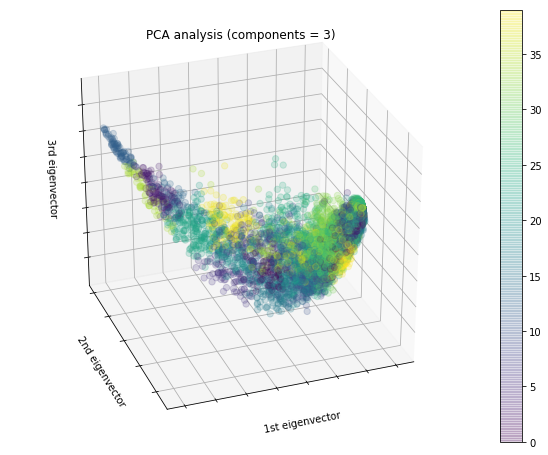

In [132]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
p = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
               c=y,
               #cmap=plt.cm.Set1,
               #edgecolor='k', 
               s=40, alpha=0.2)

ax.set_title("PCA analysis (components = 3)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

fig.colorbar(p)

In [133]:
pca = PCA(n_components=2)

In [134]:
X_reduced = pca.fit_transform(X)

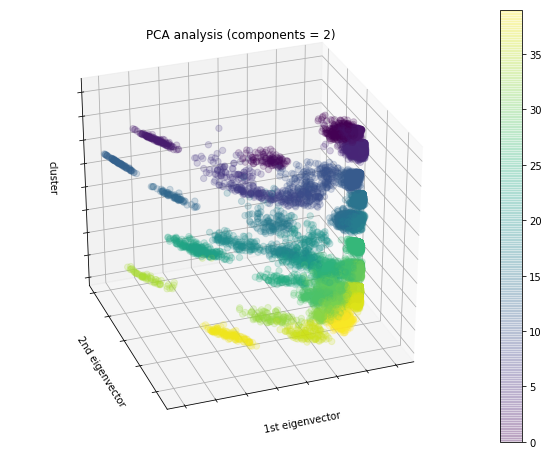

In [137]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
p = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], y, 
               c=y,
               #cmap=plt.cm.Set1, 
               #edgecolor='k',
               s=40, alpha=0.2)
ax.set_title("PCA analysis (components = 2)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("cluster")
ax.w_zaxis.set_ticklabels([])

fig.colorbar(p)

In [139]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [140]:
pca = PCA(n_components=3)

In [141]:
X_reduced = pca.fit_transform(X)

In [142]:
seriousness_df.shape

(3705460, 20)

In [143]:
dff["cluster_pca"] = kmean.fit_predict(X_reduced)

seriousness_df = pd.merge(seriousness_df, dff[["reactionmeddrapt", "cluster_pca"]],
                                        on="reactionmeddrapt")

Initialization complete
Initialization complete
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 0, inertia 2884.134725943261
Iteration 0, inertia 2881.9185823094854
start iteration
start iteration
Initialization complete
Initialization complete
done sorting
done sorting
end inner loop
Initialization complete
end inner loop
Initialization complete
Iteration 1, inertia 2714.550934875691
start iteration
start iteration
start iteration
start iteration
done sorting
done sorting
Iteration 1, inertia 2758.6726571398644
done sorting
end inner loop
start iteration
end inner loop
Iteration 0, inertia 2838.753164048864
start iteration
end inner loop
Iteration 2, inertia 2671.9819134506697
done sorting
start iteration
done sorting
Initialization complete
end inner loop
start iteration
done sorting
Initialization complete
end inner loop
end inner loop
Iteration 3, inertia 2648.324115114549
start iteration
done sorting
done sorting
end inner loop
end

Iteration 9, inertia 2579.2307367392796
start iteration
Iteration 13, inertia 2557.6767550206923
start iteration
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
Iteration 12, inertia 2596.6038048085115
start iteration
done sorting
done sorting
Iteration 11, inertia 2556.7510125883027
start iteration
end inner loop
end inner loop
done sorting
Iteration 12, inertia 2612.698983768073
done sorting
end inner loop
end inner loop
start iteration
Iteration 14, inertia 2554.807111739117
done sorting
end inner loop
Iteration 10, inertia 2574.8935338695424
start iteration
done sorting
Iteration 13, inertia 2591.3961667318495
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 13, inertia 2594.651277764635
Iteration 14, inertia 2590.071571414763
start iteration
done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
Iteration 11, inertia 2571.5435698495635
Iteration 15

Iteration 28, inertia 2584.248123501413
end inner loop
Iteration 22, inertia 2586.1541012656485
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 21, inertia 2572.0585588011527
start iteration
end inner loop
start iteration
done sorting
Iteration 23, inertia 2553.610184314146
done sorting
Iteration 27, inertia 2534.24516215072
end inner loop
end inner loop
Iteration 26, inertia 2580.994316848795
start iteration
start iteration
start iteration
Iteration 23, inertia 2583.9585526392902
done sorting
start iteration
done sorting
Iteration 22, inertia 2571.325201514022
end inner loop
end inner loop
start iteration
Iteration 23, inertia 2585.2448627466824
Iteration 28, inertia 2533.753375008396
start iteration
done sorting
done sorting
Iteration 20, inertia 2542.5747460716543
start iteration
end inner loop
Iteration 24, inertia 2553.3177330274243
done sorting
done sorting
end inner loop
end inner loop
start iteration
Iteration 29, inertia 2533.5

done sorting
end inner loop
end inner loop
Iteration 34, inertia 2565.2916163653385
Iteration 40, inertia 2531.874364434941
done sorting
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 33, inertia 2539.7079690391847
Iteration 33, inertia 2565.4760875474767
Iteration 38, inertia 2562.407982092154
Iteration 41, inertia 2531.8513772293286
Iteration 34, inertia 2581.1184834951523
start iteration
start iteration
done sorting
start iteration
start iteration
done sorting
end inner loop
start iteration
end inner loop
Iteration 4, inertia 2671.7136124979565
Iteration 34, inertia 2565.403314782987
done sorting
start iteration
end inner loop
done sorting
end inner loop
start iteration
Iteration 39, inertia 2562.011386560724
start iteration
done sorting
done sorting
done sorting
Iteration 42, inertia 2531.814492278641
start iteration
done sorting
end inner loop
end inner loop
done sorting
Iteration 35, inertia 2565.3355537652515
star

end inner loop
done sorting
Iteration 7, inertia 2646.4560175182055
start iteration
done sorting
Initialization complete
start iteration
done sorting
Iteration 46, inertia 2552.027011324753
start iteration
end inner loop
Iteration 0, inertia 2944.352997108862
done sorting
start iteration
start iteration
done sorting
start iteration
end inner loop
Iteration 18, inertia 2584.629824470692
done sorting
done sorting
done sorting
Iteration 48, inertia 2563.8751755018134
end inner loop
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 12, inertia 2596.35622817351
Iteration 8, inertia 2632.173130006433
Iteration 47, inertia 2551.9047906161554
start iteration
end inner loop
Iteration 1, inertia 2764.2852737415587
start iteration
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
Iteration 0, inertia 2865.438197726219
Iteration 4, inertia 2640.6357108969746
start iteration
end inner loop
done sorting
start iteration
end inner loop
done sorti

Iteration 31, inertia 2581.918077766658
start iteration
done sorting
Iteration 10, inertia 2556.541997952355
Iteration 10, inertia 2569.63822307585
start iteration
start iteration
start iteration
end inner loop
done sorting
start iteration
start iteration
done sorting
done sorting
start iteration
end inner loop
Iteration 32, inertia 2581.7497035835527
end inner loop
done sorting
done sorting
Iteration 11, inertia 2550.933911906033
Iteration 61, inertia 2558.824304474088
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 33, inertia 2581.530883064111
done sorting
start iteration
done sorting
done sorting
start iteration
end inner loop
end inner loop
Iteration 17, inertia 2556.2739686467303
Iteration 34, inertia 2581.3348407085696
done sorting
end inner loop
Iteration 61, inertia 2550.093091325794
start iteration
start iteration
center shift 1.626682e-02 within tolerance 3.415382e-04
done sorting
end inner loop
done sorting
Iteration 12, inertia 2547.0035

done sorting
done sorting
Iteration 12, inertia 2549.396128793849
start iteration
end inner loop
start iteration
Iteration 23, inertia 2544.6806531952175
start iteration
Iteration 28, inertia 2570.436387662203
done sorting
Iteration 30, inertia 2574.0279546709758
end inner loop
end inner loop
end inner loop
done sorting
start iteration
start iteration
end inner loop
Iteration 25, inertia 2535.695960657847
done sorting
done sorting
Iteration 2, inertia 2733.072302056321
start iteration
end inner loop
end inner loop
start iteration
done sorting
done sorting
start iteration
Iteration 29, inertia 2569.3079664096044
done sorting
done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 3, inertia 2695.780332381015
start iteration
done sorting
Iteration 24, inertia 2544.4670451828138
end inner loop
Iteration 26, inertia 2535.3913663070884
Iteration 31, inertia 2573.74665533058
Iteration 4, inertia 2675.6772346796456
start iteration
start 

done sorting
end inner loop
end inner loop
Iteration 22, inertia 2534.4846265586943
Iteration 42, inertia 2565.081590531886
end inner loop
Iteration 43, inertia 2549.383645097038
start iteration
start iteration
end inner loop
done sorting
Iteration 21, inertia 2543.3785666960503
end inner loop
Iteration 0, inertia 2817.0891059470646
start iteration
Iteration 44, inertia 2549.2497891804114
Iteration 34, inertia 2542.5770875128096
done sorting
start iteration
start iteration
start iteration
done sorting
end inner loop
end inner loop
center shift 1.663652e-02 within tolerance 3.415382e-04
done sorting
done sorting
Iteration 43, inertia 2565.014042880166
start iteration
done sorting
end inner loop
Iteration 44, inertia 2564.9848837882087
center shift 1.450353e-02 within tolerance 3.415382e-04
Iteration 16, inertia 2622.343036243265
done sorting
Iteration 23, inertia 2533.7836703429302
start iteration
end inner loop
Initialization complete
done sorting
Iteration 1, inertia 2676.483887663239

start iteration
Iteration 11, inertia 2598.527674979317
Initialization complete
done sorting
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 12, inertia 2595.9955810659794
start iteration
done sorting
Iteration 9, inertia 2617.767841664375
end inner loop
end inner loop
done sorting
Iteration 6, inertia 2576.765004257291
start iteration
start iteration
end inner loop
done sorting
done sorting
Iteration 6, inertia 2615.6724989185045
end inner loop
end inner loop
start iteration
start iteration
end inner loop
start iteration
Iteration 13, inertia 2593.6955185558104
Iteration 31, inertia 2531.400112451958
done sorting
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 0, inertia 2872.5332594418846
start iteration
done sorting
Iteration 14, inertia 2591.322129819756
Iteration 10, inertia 2615.2941676653872
start iteration
Iteration 33, inertia 2606.9934456037463
done sorting
start iteration
done sorting
done so

start iteration
done sorting
end inner loop
Iteration 14, inertia 2562.5033178919875
start iteration
done sorting
end inner loop
Iteration 15, inertia 2557.1255725291917
start iteration
done sorting
Initialization complete
end inner loop
Iteration 8, inertia 2611.9656771084383
Iteration 16, inertia 2549.9962487305133
start iteration
Iteration 17, inertia 2577.569182304521
Iteration 19, inertia 2556.200737783009
done sorting
start iteration
start iteration
done sorting
start iteration
start iteration
done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
Iteration 17, inertia 2544.0545875864773
end inner loop
start iteration
done sorting
Iteration 20, inertia 2555.66984979449
done sorting
Iteration 0, inertia 2865.0357018571663
start iteration
end inner loop
done sorting
Iteration 25, inertia 2565.710081617941
end inner loop
done sorting
done sorting
start iteration
Iteration 18, inertia 2540.5004151155094
Iteration 21, inertia 2555.2464384255336
Iteratio

Iteration 29, inertia 2524.192691467794
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
done sorting
done sorting
Iteration 3, inertia 2645.4883022431072
Iteration 7, inertia 2576.3452680437995
end inner loop
start iteration
Iteration 34, inertia 2552.066033143106
start iteration
done sorting
start iteration
Iteration 30, inertia 2523.357036663681
end inner loop
done sorting
done sorting
start iteration
Iteration 13, inertia 2552.8522679380167
start iteration
end inner loop
start iteration
done sorting
end inner loop
Iteration 35, inertia 2550.8673575930375
end inner loop
start iteration
end inner loop
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 29, inertia 2550.5774177219855
Iteration 18, inertia 2580.017139119643
Iteration 36, inertia 2549.9261450143704
Iteration 8, inertia 2570.0523916883994
start iteration
start iteration
Iteration 4, inertia 2623.132807697577
Iteration 31, inertia 2522.342393738712
Iterati

end inner loop
end inner loop
Iteration 42, inertia 2538.9320903430607
Iteration 19, inertia 2572.818697336389
end inner loop
start iteration
Iteration 18, inertia 2553.7504049953404
start iteration
done sorting
done sorting
start iteration
end inner loop
Iteration 27, inertia 2541.9828265463116
done sorting
start iteration
done sorting
Iteration 20, inertia 2569.5978029268867
end inner loop
start iteration
end inner loop
done sorting
Initialization complete
end inner loop
end inner loop
Iteration 21, inertia 2566.9532018276573
Initialization complete
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 28, inertia 2541.5515658380978
Iteration 19, inertia 2553.4522633744764
Iteration 43, inertia 2538.4980288558213
start iteration
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 22, inertia 2564.5855476585916
done sorting
end inner loop
start iteration
start iteration
Iteration 28, inertia 2570.3543576177367

start iteration
done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
Iteration 9, inertia 2563.5784224868084
Iteration 38, inertia 2540.3443042157032
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 7, inertia 2605.466234196702
Iteration 42, inertia 2563.3917918385114
end inner loop
end inner loop
Iteration 39, inertia 2540.274723539115
Iteration 4, inertia 2642.312581850238
start iteration
start iteration
start iteration
start iteration
done sorting
done sorting
Iteration 31, inertia 2545.671473599574
done sorting
Iteration 58, inertia 2534.7147666049354
end inner loop
start iteration
Iteration 34, inertia 2558.581944155704
done sorting
Iteration 40, inertia 2540.210045449365
end inner loop
start iteration
end inner loop
start iteration
done sorting
end inner loop
done sorting
start iteration
start iteration
end inner loop
done sorting
done sorting
done sorting
Iteration 10, inertia 2560.4299852335616
Iteration 43, ine

done sorting
start iteration
start iteration
end inner loop
done sorting
done sorting
Iteration 40, inertia 2540.249945513375
Iteration 21, inertia 2550.950916358758
end inner loop
start iteration
done sorting
end inner loop
Iteration 16, inertia 2588.702754109853
Iteration 20, inertia 2566.7900071873883
start iteration
end inner loop
done sorting
start iteration
end inner loop
start iteration
Iteration 6, inertia 2584.7672815338874
Iteration 10, inertia 2544.500443723259
done sorting
start iteration
done sorting
start iteration
start iteration
done sorting
Iteration 17, inertia 2587.0354950575133
end inner loop
done sorting
done sorting
end inner loop
start iteration
end inner loop
Iteration 8, inertia 2582.928232858813
end inner loop
Iteration 21, inertia 2566.2284672007117
end inner loop
Iteration 22, inertia 2550.3487513570444
done sorting
start iteration
start iteration
done sorting
Iteration 41, inertia 2539.9511139559945
Iteration 7, inertia 2579.0769317464606
done sorting
start

end inner loop
Iteration 31, inertia 2555.327107586532
end inner loop
Iteration 35, inertia 2546.0747368243215
Iteration 24, inertia 2534.7888758494323
Iteration 19, inertia 2547.896307871291
end inner loop
end inner loop
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 15, inertia 2552.6461192417732
start iteration
start iteration
Iteration 32, inertia 2554.0213519384774
done sorting
Iteration 15, inertia 2583.0698077575876
Iteration 36, inertia 2545.969738005572
start iteration
start iteration
done sorting
done sorting
done sorting
start iteration
end inner loop
end inner loop
done sorting
end inner loop
start iteration
start iteration
end inner loop
Iteration 16, inertia 2550.742458051442
Iteration 25, inertia 2534.2909345252974
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 30, inertia 2558.969023945786
start iteration
Iteration 26, inertia 2533.9246803587052
Iteration

start iteration
done sorting
end inner loop
Iteration 26, inertia 2554.5341063104365
done sorting
Iteration 8, inertia 2603.8282646016537
Iteration 46, inertia 2541.713658073548
end inner loop
Iteration 5, inertia 2645.7250351319876
start iteration
done sorting
end inner loop
start iteration
start iteration
start iteration
Iteration 27, inertia 2552.7650634359475
start iteration
Iteration 37, inertia 2528.647254973524
done sorting
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 6, inertia 2627.283711855968
Iteration 38, inertia 2527.8638033656134
end inner loop
done sorting
start iteration
end inner loop
done sorting
start iteration
Iteration 28, inertia 2550.7395570655217
done sorting
end inner loop
end inner loop
Iteration 39, inertia 2527.307598408902
start iteration
done sorting
end inner loop
Iteration 40, inertia 2527.0640507160297
done sorting
start iteration
done sorting
Initialization complete
Iteration 9, inertia 2594.2696644409793
end inner 

start iteration
start iteration
end inner loop
done sorting
done sorting
end inner loop
end inner loop
Iteration 22, inertia 2545.48575521128
Iteration 58, inertia 2529.5194693698045
end inner loop
done sorting
Iteration 11, inertia 2628.8098864494877
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 8, inertia 2554.675054463255
end inner loop
done sorting
Iteration 59, inertia 2529.3362435830973
start iteration
Iteration 12, inertia 2593.136788071213
start iteration
Iteration 6, inertia 2589.8125245302544
done sorting
start iteration
start iteration
end inner loop
done sorting
Iteration 38, inertia 2538.05471528641
end inner loop
done sorting
end inner loop
end inner loop
Iteration 7, inertia 2583.5716508856635
Iteration 60, inertia 2529.272198140578
start iteration
start iteration
done sorting
Iteration 12, inertia 2623.6742659893353
start iteration
Iteration 16, inertia 2545.303211657239
Iteration 23, inerti

start iteration
done sorting
end inner loop
start iteration
Iteration 19, inertia 2537.9564956282566
end inner loop
start iteration
Iteration 25, inertia 2537.8737833486816
start iteration
end inner loop
Iteration 7, inertia 2610.974215237449
start iteration
end inner loop
Iteration 24, inertia 2602.1416626246196
start iteration
done sorting
Iteration 28, inertia 2537.1791950823213
done sorting
start iteration
end inner loop
done sorting
Iteration 48, inertia 2531.4364718579773
done sorting
end inner loop
end inner loop
Iteration 36, inertia 2541.7550160750043
center shift 0.000000e+00 within tolerance 3.415382e-04
start iteration
done sorting
Iteration 8, inertia 2606.9085759759837
start iteration
end inner loop
Iteration 49, inertia 2531.264792285186
done sorting
end inner loop
start iteration
done sorting
done sorting
end inner loop
done sorting
end inner loop
Iteration 9, inertia 2603.2903512571042
end inner loop
start iteration
start iteration
done sorting
Iteration 20, inertia 25

start iteration
done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 37, inertia 2526.4292662376592
start iteration
done sorting
Iteration 5, inertia 2620.4182266309385
end inner loop
done sorting
Iteration 20, inertia 2562.4087470096006
start iteration
end inner loop
start iteration
done sorting
done sorting
start iteration
Iteration 36, inertia 2589.7308967587132
done sorting
Iteration 8, inertia 2585.9619956593206
end inner loop
end inner loop
end inner loop
Iteration 28, inertia 2553.7538722633763
end inner loop
Iteration 38, inertia 2526.25957589564
Iteration 40, inertia 2533.187077899711
start iteration
start iteration
done sorting
Iteration 32, inertia 2530.712098846806
end inner loop
done sorting
Iteration 6, inertia 2606.4026938453108
start iteration
start iteration
start iteration
done sorting
Iteration 39, inertia 2526.1550860176876
end inner loop
start iteration
done sorting
start iteration
done sorting
done sorting

done sorting
Iteration 40, inertia 2529.4369104766592
end inner loop
Iteration 23, inertia 2560.8318842335534
end inner loop
done sorting
start iteration
end inner loop
start iteration
start iteration
done sorting
end inner loop
done sorting
done sorting
end inner loop
Iteration 51, inertia 2578.127224092578
Iteration 24, inertia 2559.990491927304
Iteration 18, inertia 2559.6826175781703
end inner loop
start iteration
end inner loop
Iteration 32, inertia 2538.1276128622117
done sorting
end inner loop
end inner loop
start iteration
Iteration 41, inertia 2529.3239347468484
start iteration
start iteration
start iteration
Iteration 5, inertia 2656.2103441574327
done sorting
end inner loop
done sorting
Iteration 33, inertia 2536.8900420592677
start iteration
done sorting
end inner loop
end inner loop
start iteration
Iteration 39, inertia 2542.82930034002
Iteration 34, inertia 2534.3675386413747
done sorting
Iteration 42, inertia 2529.244530830722
done sorting
start iteration
done sorting
en

end inner loop
Iteration 62, inertia 2576.720268823986
start iteration
done sorting
start iteration
end inner loop
start iteration
end inner loop
done sorting
Iteration 7, inertia 2600.739620216243
end inner loop
Iteration 5, inertia 2603.5458025445
Iteration 15, inertia 2584.7030976338838
start iteration
Iteration 13, inertia 2557.908274102487
start iteration
done sorting
start iteration
done sorting
start iteration
center shift 1.608019e-02 within tolerance 3.415382e-04
end inner loop
end inner loop
Iteration 35, inertia 2554.1654339951774
done sorting
Iteration 45, inertia 2520.2897488457857
end inner loop
Iteration 34, inertia 2551.4961120716566
start iteration
done sorting
Iteration 14, inertia 2556.9583184564576
done sorting
end inner loop
done sorting
Iteration 35, inertia 2551.133272628119
start iteration
done sorting
start iteration
Iteration 6, inertia 2586.9437584988386
start iteration
done sorting
end inner loop
done sorting
Iteration 36, inertia 2553.190997936578
end inner

start iteration
Iteration 21, inertia 2524.090474000414
Initialization complete
end inner loop
end inner loop
Iteration 28, inertia 2551.9996577281718
start iteration
start iteration
done sorting
done sorting
done sorting
start iteration
Iteration 18, inertia 2567.8438262362315
start iteration
Iteration 3, inertia 2649.405451162396
done sorting
start iteration
done sorting
end inner loop
done sorting
end inner loop
start iteration
end inner loop
Iteration 0, inertia 2922.9342727876233
end inner loop
Iteration 27, inertia 2550.182988412308
end inner loop
end inner loop
done sorting
done sorting
end inner loop
Iteration 29, inertia 2551.8910193076727
start iteration
Iteration 51, inertia 2536.7992210872662
Iteration 7, inertia 2615.169474583571
Iteration 4, inertia 2637.7168842354718
start iteration
start iteration
done sorting
start iteration
start iteration
end inner loop
done sorting
Iteration 22, inertia 2523.4181367137166
done sorting
end inner loop
start iteration
done sorting
star

done sorting
end inner loop
end inner loop
start iteration
end inner loop
Iteration 15, inertia 2598.079219547775
start iteration
done sorting
Iteration 38, inertia 2542.387264949942
done sorting
Iteration 34, inertia 2521.4001861261254
Iteration 39, inertia 2551.1724473604113
center shift 9.292618e-03 within tolerance 3.415382e-04
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
start iteration
Iteration 40, inertia 2551.083413092052
done sorting
end inner loop
Iteration 63, inertia 2533.6964338984335
end inner loop
start iteration
Iteration 39, inertia 2542.201140123809
start iteration
done sorting
done sorting
done sorting
start iteration
done sorting
Iteration 12, inertia 2594.280874186273
Iteration 16, inertia 2592.474493964408
end inner loop
Iteration 40, inertia 2541.9174375296584
end inner loop
start iteration
done sorting
end inner loop
start iteration
end inner loop
end inner loop
Iteration 64, inertia 2533.5474453755114
start iteration


Iteration 32, inertia 2529.9295626640273
done sorting
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 2, inertia 2721.496751817747
done sorting
start iteration
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 3, inertia 2615.7979708699727
done sorting
start iteration
Iteration 1, inertia 2708.4466917529203
done sorting
end inner loop
end inner loop
end inner loop
start iteration
Iteration 3, inertia 2694.4059105818296
done sorting
start iteration
Iteration 23, inertia 2592.5030613818813
Iteration 34, inertia 2567.177800455034
Iteration 9, inertia 2602.7132045744856
end inner loop
start iteration
done sorting
done sorting
Iteration 33, inertia 2529.3594294943164
start iteration
start iteration
end inner loop
done sorting
Iteration 4, inertia 2670.054819856747
done sorting
Iteration 2, inertia 2650.573157906337
start iteration
end inner loop
end inner loop
Iteration 34, inertia 2528.693917591901
start iteration
done sor

end inner loop
done sorting
end inner loop
end inner loop
Iteration 20, inertia 2579.788611564168
Iteration 14, inertia 2564.8575806835906
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 6, inertia 2612.100297054177
done sorting
start iteration
start iteration
done sorting
Iteration 47, inertia 2565.477715689347
start iteration
start iteration
Iteration 21, inertia 2578.706840272261
done sorting
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
start iteration
Iteration 9, inertia 2594.4204315600355
start iteration
end inner loop
done sorting
done sorting
Iteration 46, inertia 2516.832265630653
done sorting
Iteration 13, inertia 2550.0172673990724
end inner loop
start iteration
end inner loop
Iteration 15, inertia 2560.2087021223288
done sorting
Iteration 22, inertia 2577.7750340445946
end inner loop
start iteration
start iteration
done sorting
end inner loop
end inner loop
Iteration 14, inertia 2545.499369061461
s

done sorting
start iteration
end inner loop
done sorting
done sorting
end inner loop
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 3, inertia 2696.259434942746
Iteration 27, inertia 2533.0473952007846
end inner loop
start iteration
Iteration 4, inertia 2630.9718705821674
start iteration
done sorting
Iteration 33, inertia 2570.303898374268
start iteration
end inner loop
done sorting
Iteration 26, inertia 2557.1181941309655
end inner loop
start iteration
Iteration 32, inertia 2524.358703821361
start iteration
done sorting
end inner loop
Iteration 4, inertia 2673.9107899356927
start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 5, inertia 2617.0785378633395
start iteration
Iteration 28, inertia 2532.983709407163
end inner loop
done sorting
end inner loop
start iteration
done sorting
end inner loop
done sorting
done sorting
end inner loop
Iteration 34, inertia 2570.04922636832
Iteration 33, inertia 2522.6152605558027
end in

end inner loop
start iteration
end inner loop
end inner loop
start iteration
done sorting
done sorting
Iteration 0, inertia 2905.8683630194414
start iteration
end inner loop
end inner loop
start iteration
done sorting
Iteration 16, inertia 2561.8922054734703
end inner loop
Iteration 48, inertia 2565.9276218518216
end inner loop
Iteration 36, inertia 2545.7777182448644
start iteration
start iteration
done sorting
Iteration 30, inertia 2546.6084654684455
Iteration 0, inertia 2826.7278770355424
start iteration
Iteration 7, inertia 2587.9573952944356
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
done sorting
done sorting
start iteration
end inner loop
done sorting
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
Iteration 49, inertia 2565.889067795951
Iteration 1, inertia 2745.4670919062673
Iteration 37, inertia 2545.6601106407284
start iteration
done sorting
Iteration 17, inertia 2539.4646700836647
end inner loop
start iter

start iteration
start iteration
end inner loop
start iteration
done sorting
end inner loop
done sorting
done sorting
end inner loop
done sorting
end inner loop
Iteration 6, inertia 2579.1406908977942
Iteration 12, inertia 2600.139544030074
end inner loop
start iteration
end inner loop
start iteration
done sorting
done sorting
Iteration 28, inertia 2552.694819739888
end inner loop
Iteration 19, inertia 2550.6231565963053
done sorting
Iteration 44, inertia 2537.1511858540866
start iteration
end inner loop
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 30, inertia 2528.2585369425465
Iteration 10, inertia 2571.7939835511042
Iteration 45, inertia 2536.756079566717
done sorting
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 13, inertia 2598.7552940887836
start iteration
Iteration 9, inertia 2605.7861603138217
end inner loop
start iteration
done sorting
done sorting
start iteration
Iteration 29, inertia 2552.468395089917

done sorting
Iteration 1, inertia 2685.2322467002446
end inner loop
done sorting
start iteration
center shift 1.167754e-02 within tolerance 3.415382e-04
start iteration
done sorting
end inner loop
Iteration 20, inertia 2537.311693629913
start iteration
done sorting
done sorting
end inner loop
Iteration 2, inertia 2638.054417389033
done sorting
end inner loop
start iteration
end inner loop
end inner loop
Iteration 17, inertia 2551.4811418426284
Iteration 21, inertia 2536.784064747291
start iteration
end inner loop
Iteration 21, inertia 2555.472070147127
done sorting
done sorting
done sorting
start iteration
Iteration 42, inertia 2550.919824339414
end inner loop
start iteration
done sorting
end inner loop
Iteration 24, inertia 2588.1593298360785
end inner loop
done sorting
end inner loop
Iteration 3, inertia 2612.3133433904522
Iteration 22, inertia 2553.983238518222
end inner loop
Iteration 18, inertia 2551.0525386204063
Iteration 43, inertia 2550.7343750941573
start iteration
start iter

start iteration
Iteration 29, inertia 2546.296364867622
done sorting
Iteration 15, inertia 2550.008174654725
done sorting
end inner loop
start iteration
start iteration
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 31, inertia 2549.500374464647
done sorting
done sorting
Iteration 36, inertia 2578.355484728024
Iteration 35, inertia 2530.3696509202177
Iteration 16, inertia 2548.256134630052
start iteration
done sorting
end inner loop
end inner loop
start iteration
start iteration
done sorting
center shift 8.465896e-03 within tolerance 3.415382e-04
Iteration 6, inertia 2579.667192783809
Iteration 12, inertia 2589.361234364108
Iteration 0, inertia 2766.134821877517
end inner loop
done sorting
start iteration
end inner loop
start iteration
done sorting
end inner loop
done sorting
start iteration
end inner loop
Iteration 17, inertia 2546.68571383498
done sorting
start iteration
start iteration
Iteration 7, inertia 2564.7491320619483
end inner loop
Iterat

end inner loop
start iteration
end inner loop
Iteration 23, inertia 2573.584593265385
done sorting
done sorting
end inner loop
start iteration
Iteration 1, inertia 2654.9409695277363
end inner loop
Iteration 29, inertia 2535.040980557074
done sorting
end inner loop
end inner loop
Iteration 13, inertia 2549.0267916017865
start iteration
done sorting
Iteration 24, inertia 2573.1192281658064
Iteration 0, inertia 2957.0410370940563
end inner loop
Iteration 19, inertia 2543.3666333210267
start iteration
Iteration 14, inertia 2548.664195692238
Iteration 7, inertia 2663.428582836619
start iteration
start iteration
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
start iteration
Iteration 2, inertia 2617.174649120769
Iteration 30, inertia 2534.7323101867473
Iteration 15, inertia 2548.0280666639073
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
done sorting
end inner loop
en

start iteration
done sorting
Iteration 23, inertia 2541.4790536366886
Iteration 12, inertia 2569.5090044242465
end inner loop
end inner loop
start iteration
Iteration 16, inertia 2554.8199860925424
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 20, inertia 2628.9594534729267
start iteration
done sorting
end inner loop
end inner loop
end inner loop
done sorting
end inner loop
Iteration 39, inertia 2531.2250517882653
Iteration 32, inertia 2541.1098659847453
start iteration
end inner loop
done sorting
start iteration
done sorting
Iteration 24, inertia 2540.4453897234475
end inner loop
start iteration
Iteration 11, inertia 2589.1684509220013
Iteration 13, inertia 2568.0159799364483
done sorting
Iteration 40, inertia 2531.1343263613217
end inner loop
start iteration
done sorting
Iteration 25, inertia 2539.280002841417
end inner loop
start iteration
done sorting
end inner loop
Iteration 36, inertia 2565.6773828675164
start iteration
done sorting
end inner 

done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 2, inertia 2672.0614575987306
Iteration 8, inertia 2632.449169285678
end inner loop
done sorting
start iteration
Iteration 23, inertia 2579.49131714427
done sorting
start iteration
end inner loop
Iteration 30, inertia 2624.1675105553845
done sorting
done sorting
end inner loop
start iteration
end inner loop
done sorting
Iteration 46, inertia 2562.7718877538036
Iteration 41, inertia 2522.552819225104
start iteration
end inner loop
start iteration
end inner loop
done sorting
start iteration
end inner loop
Iteration 9, inertia 2624.876187289225
done sorting
Iteration 27, inertia 2561.6611349117925
done sorting
Iteration 31, inertia 2623.8206349125057
end inner loop
center shift 1.554129e-02 within tolerance 3.415382e-04
start iteration
end inner loop
done sorting
Iteration 24, inertia 2579.311766171161
Iteration 27, inertia 2541.0405611323317
start iteration
start iteration
done sorting
end inner loop
done s

done sorting
done sorting
end inner loop
end inner loop
end inner loop
start iteration
Iteration 6, inertia 2619.3454724343237
Iteration 13, inertia 2578.0262010109764
done sorting
Iteration 52, inertia 2518.8925325057276
Iteration 39, inertia 2529.7167003300374
start iteration
done sorting
center shift 2.740859e-03 within tolerance 3.415382e-04
start iteration
end inner loop
end inner loop
start iteration
done sorting
Iteration 14, inertia 2576.9340502035657
end inner loop
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 1, inertia 2737.0543239288786
end inner loop
Iteration 15, inertia 2575.7198953142074
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 10, inertia 2550.709259100748
Iteration 16, inertia 2574.4855263497648
Iteration 53, inertia 2518.807090617466
start iteration
done sorting
end inner loop
end inner loop
start iteration
Iteration 2, inertia 2675.59861720384
done sorting
end inner loop
start iteration
It

done sorting
Iteration 34, inertia 2539.407437132132
Iteration 23, inertia 2530.8024750857458
start iteration
Iteration 10, inertia 2566.727767026661
done sorting
done sorting
start iteration
done sorting
start iteration
end inner loop
end inner loop
done sorting
end inner loop
end inner loop
Iteration 24, inertia 2530.0487282052404
end inner loop
Iteration 5, inertia 2615.5220818077296
start iteration
start iteration
done sorting
done sorting
Iteration 35, inertia 2538.916188724451
end inner loop
Iteration 31, inertia 2562.009598390148
start iteration
Iteration 6, inertia 2606.3787824315455
done sorting
start iteration
end inner loop
Iteration 1, inertia 2751.0129570379977
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
start iteration
end inner loop
end inner loop
done sorting
done sorting
end inner loop
Iteration 14, inertia 2597.437566415488
Iteration 2, inertia 2682.1246394044138
Iteration 25, inertia 2529.277945186941
start iteration
Iterat

done sorting
start iteration
done sorting
end inner loop
Iteration 30, inertia 2566.2280088379202
done sorting
start iteration
end inner loop
Iteration 36, inertia 2526.0230142261266
done sorting
end inner loop
Iteration 12, inertia 2578.1344576309925
start iteration
end inner loop
end inner loop
done sorting
start iteration
start iteration
end inner loop
done sorting
Iteration 37, inertia 2525.8941767619367
Iteration 26, inertia 2570.305201123455
done sorting
start iteration
end inner loop
start iteration
Iteration 31, inertia 2565.99862970391
done sorting
Iteration 13, inertia 2573.3157100925687
end inner loop
start iteration
end inner loop
Iteration 25, inertia 2546.218063712172
Iteration 0, inertia 2906.7470712060126
done sorting
start iteration
done sorting
Iteration 38, inertia 2525.797872563254
done sorting
end inner loop
end inner loop
end inner loop
Iteration 46, inertia 2533.026545721759
Iteration 1, inertia 2721.1753648393437
start iteration
start iteration
end inner loop
do

end inner loop
done sorting
start iteration
Iteration 7, inertia 2549.7305666831708
start iteration
done sorting
end inner loop
Iteration 37, inertia 2555.550090143761
done sorting
start iteration
Iteration 11, inertia 2554.204023706162
end inner loop
done sorting
start iteration
start iteration
done sorting
end inner loop
Iteration 39, inertia 2543.221763152898
end inner loop
end inner loop
start iteration
Iteration 8, inertia 2546.6808187421866
end inner loop
done sorting
Iteration 38, inertia 2553.3538122721548
end inner loop
Iteration 31, inertia 2541.1181359940674
Iteration 12, inertia 2551.1708341448802
start iteration
start iteration
done sorting
Iteration 24, inertia 2555.399753888419
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 40, inertia 2543.0674816515693
done sorting
done sorting
end inner loop
Iteration 5, inertia 2570.8562632901576
end inner loop
start iteration
Iteration 61, inertia 2531.1252023789807
start iteration


start iteration
Iteration 2, inertia 2638.614555289086
done sorting
done sorting
start iteration
end inner loop
Iteration 20, inertia 2533.339320990656
end inner loop
Iteration 44, inertia 2537.527108854073
done sorting
Iteration 5, inertia 2629.8117950615
Iteration 48, inertia 2540.7199482357482
end inner loop
end inner loop
start iteration
Iteration 18, inertia 2540.4616263672297
start iteration
Iteration 4, inertia 2690.568045819798
done sorting
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 3, inertia 2614.244350804216
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
done sorting
start iteration
end inner loop
Iteration 23, inertia 2522.115666383237
end inner loop
start iteration
Iteration 5, inertia 2676.332554853994
start iteration
done sorting
start iteration
done sorting
Iteration 19, inertia 2539.3394638233135
done sorting
start iteration
Iteration 21, inertia 2532.725872765135
Iteration 49, inertia 2540

done sorting
Iteration 13, inertia 2611.4874048282154
done sorting
Iteration 16, inertia 2585.892588632039
end inner loop
start iteration
end inner loop
end inner loop
done sorting
end inner loop
Iteration 58, inertia 2538.9766120295008
Iteration 36, inertia 2516.4681976340926
Iteration 3, inertia 2672.48610793001
Iteration 34, inertia 2529.48943162214
Iteration 17, inertia 2556.8103603685154
start iteration
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
start iteration
Iteration 33, inertia 2528.608546740082
Iteration 14, inertia 2610.498491088533
end inner loop
start iteration
start iteration
Iteration 18, inertia 2556.231153573178
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
done sorting
end inner loop
end inner loop
Iteration 59, inertia 2538.81971034156
done sorting
Iteration 15, inertia 2609.078029548832
start iteration
done sorting
end inner loop
start iteration
end inner loop
done sorting
start it

end inner loop
start iteration
end inner loop
Iteration 16, inertia 2579.096637377631
done sorting
Iteration 29, inertia 2551.9638207777575
done sorting
start iteration
end inner loop
done sorting
end inner loop
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 17, inertia 2575.072213619203
start iteration
Iteration 4, inertia 2642.528611091995
start iteration
done sorting
end inner loop
end inner loop
Iteration 46, inertia 2522.2356307944665
Iteration 28, inertia 2572.2506099350735
end inner loop
Iteration 5, inertia 2633.0036159885185
start iteration
Iteration 30, inertia 2551.746279046297
done sorting
start iteration
done sorting
done sorting
start iteration
end inner loop
done sorting
Iteration 47, inertia 2522.179656722395
end inner loop
Iteration 48, inertia 2513.2638913786645
start iteration
start iteration
done sorting
Iteration 29, inertia 2594.1241145880836
end inner loop
start iteration
done sorting
end inner loop
start iteration
Iteration 31,

Iteration 41, inertia 2569.263853335455
start iteration
start iteration
end inner loop
done sorting
Iteration 1, inertia 2696.4416115805925
done sorting
end inner loop
end inner loop
Iteration 17, inertia 2596.856545201674
start iteration
start iteration
done sorting
end inner loop
done sorting
start iteration
Iteration 18, inertia 2592.7728326774704
done sorting
end inner loop
Iteration 6, inertia 2571.7392358562397
start iteration
Iteration 4, inertia 2680.004320899199
done sorting
end inner loop
Iteration 29, inertia 2563.4192901735255
done sorting
Iteration 7, inertia 2587.3181981515804
start iteration
start iteration
end inner loop
end inner loop
start iteration
Iteration 42, inertia 2569.046991823726
done sorting
start iteration
done sorting
end inner loop
done sorting
Iteration 12, inertia 2555.1346622744445
end inner loop
Iteration 2, inertia 2654.521241331258
Iteration 7, inertia 2566.1758921499713
start iteration
done sorting
done sorting
Iteration 8, inertia 2584.62317756455

Iteration 17, inertia 2540.1159039439
done sorting
end inner loop
start iteration
end inner loop
start iteration
done sorting
done sorting
done sorting
Iteration 34, inertia 2548.4897561698217
end inner loop
start iteration
end inner loop
done sorting
Iteration 12, inertia 2566.541585595984
Iteration 18, inertia 2537.54353018006
Iteration 24, inertia 2548.733976881052
end inner loop
start iteration
start iteration
Iteration 20, inertia 2570.4483499543703
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
end inner loop
done sorting
end inner loop
Iteration 35, inertia 2547.948367398391
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 15, inertia 2599.5956912713864
Iteration 13, inertia 2563.2120590371865
Iteration 4, inertia 2660.2018511158203
start iteration
done sorting
start iteration
Iteration 25, inertia 2548.6402627535795
Iteration 19, inertia 2534.7640091020526
start iteration
done sorting
start iteration
done

start iteration
start iteration
done sorting
done sorting
Iteration 14, inertia 2582.4147539407304
done sorting
end inner loop
end inner loop
end inner loop
start iteration
Iteration 47, inertia 2532.549073431067
Iteration 24, inertia 2545.3092532499636
end inner loop
start iteration
done sorting
Iteration 29, inertia 2525.7315845238945
start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 18, inertia 2564.863482945924
end inner loop
end inner loop
done sorting
Iteration 8, inertia 2588.166866133215
Iteration 30, inertia 2525.5719511831535
start iteration
end inner loop
done sorting
start iteration
Iteration 26, inertia 2574.295039596755
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 48, inertia 2530.509519520872
Iteration 33, inertia 2562.7570818699123
start iteration
done sorting
done sorting
start iteration
Iteration 25, inertia 2544.84608818505
done sorting
Iteration 15, inertia 2579.5540592063235
end i

end inner loop
Iteration 59, inertia 2522.739735516168
Iteration 43, inertia 2553.706117262796
start iteration
done sorting
Iteration 44, inertia 2520.9137544775595
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 45, inertia 2520.8945293728134
end inner loop
Iteration 44, inertia 2553.1037558045946
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 19, inertia 2568.5220590876243
start iteration
Iteration 60, inertia 2522.644567562209
Iteration 29, inertia 2560.808094356122
start iteration
Iteration 39, inertia 2569.599346935966
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
done sorting
Iteration 26, inertia 2556.9652290325284
end inner loop
Iteration 45, inertia 2552.749672744423
start iteration
start iteration
Iteration 40, inertia 2569.352067160465
start iteration
done sorting
end inner loop
Iteration 46, inertia 2520.889506162841
done sorting
end inner loop
done s

Iteration 7, inertia 2573.2314861030663
start iteration
done sorting
done sorting
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
Iteration 0, inertia 2923.489415592938
start iteration
Iteration 29, inertia 2553.308539101379
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 52, inertia 2566.772700701431
end inner loop
start iteration
Iteration 8, inertia 2567.8205090329334
start iteration
Iteration 59, inertia 2551.0880419741297
Iteration 8, inertia 2622.6992470140503
done sorting
start iteration
Iteration 44, inertia 2556.004559079865
Iteration 1, inertia 2756.446164278516
Iteration 30, inertia 2550.6315662625766
start iteration
done sorting
done sorting
end inner loop
end inner loop
start iteration
done sorting
done sorting
end inner loop
Iteration 53, inertia 2566.7135322827703
center shift 1.584300e-02 within tolerance 3.415382e-04
Iteration 9, inertia 2615.720550546506

start iteration
done sorting
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
center shift 1.109311e-02 within tolerance 3.415382e-04
Iteration 13, inertia 2590.7949795714
start iteration
Iteration 21, inertia 2558.4791907967583
done sorting
Iteration 14, inertia 2559.0740684686975
Iteration 48, inertia 2521.0652037922428
end inner loop
start iteration
end inner loop
Iteration 14, inertia 2588.1223713712607
start iteration
start iteration
done sorting
Iteration 16, inertia 2579.132345183572
done sorting
end inner loop
end inner loop
start iteration
Iteration 49, inertia 2520.948638314628
start iteration
done sorting
Iteration 15, inertia 2557.508319921235
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
done sorting
end inner loop
Iteration 16, inertia 2556.205528092453
start iteration
done sorting
end inner loop
Iteration 17, inertia 2555.269293502598
start iteration
done sorting
end inner loop
done sorting
end inner loop


Iteration 69, inertia 2518.117549874938
start iteration
end inner loop
Iteration 37, inertia 2560.6257007437384
end inner loop
start iteration
done sorting
done sorting
end inner loop
start iteration
Iteration 37, inertia 2550.9803499152695
Iteration 30, inertia 2578.7402505154027
start iteration
start iteration
done sorting
end inner loop
end inner loop
Iteration 38, inertia 2560.582898841813
start iteration
Iteration 35, inertia 2547.6206966214777
done sorting
Iteration 31, inertia 2578.6774756070295
done sorting
done sorting
end inner loop
end inner loop
start iteration
done sorting
Iteration 39, inertia 2560.537785934709
center shift 1.591347e-02 within tolerance 3.415382e-04
start iteration
done sorting
Iteration 38, inertia 2550.86540025941
end inner loop
end inner loop
Iteration 40, inertia 2560.5066285054268
start iteration
done sorting
Iteration 36, inertia 2547.5898692218266
end inner loop
start iteration
done sorting
Iteration 41, inertia 2560.4916800890715
end inner loop
en

In [144]:
seriousness_df.shape

(3705460, 21)

In [145]:
seriousness_df

In [146]:
y = dff["cluster_pca"].values

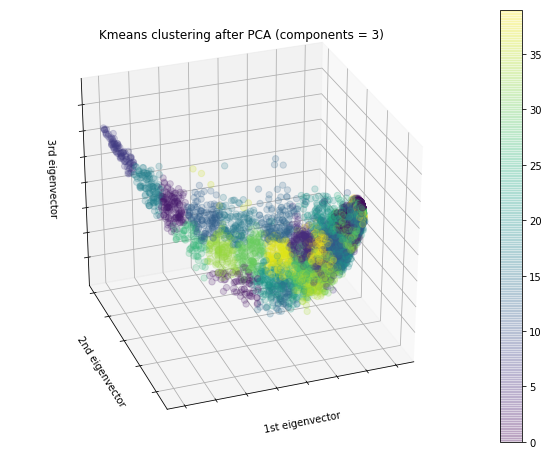

In [150]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
p = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
               c=y,
               #cmap=plt.cm.Set1,
               #edgecolor='k', 
               s=40, alpha=0.2)

ax.set_title("Kmeans clustering after PCA (components = 3)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

fig.colorbar(p)

In [151]:
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components=3).fit_transform(X)

In [152]:
dff["cluster_TSNE"] = kmean.fit_predict(X_reduced)

seriousness_df = pd.merge(seriousness_df, dff[["reactionmeddrapt", "cluster_TSNE"]],
                                        on="reactionmeddrapt")

Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
Initialization complete
start iteration
start iteration
done sorting
Initialization complete
Initialization complete
start iteration
done sorting
end inner loop
start iteration
end inner loop
start iteration
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
done sorting
Iteration 0, inertia 1072327.4
start iteration
end inner loop
done sorting
end inner loop
Iteration 0, inertia 1068193.9
end inner loop
start iteration
done sorting
end inner loop
Iteration 0, inertia 1038879.75
done sorting
Iteration 0, inertia 1069757.8
start iteration
start iteration
Iteration 0, inertia 1031374.0
done sorting
done sorting
Iteration 0, inertia 1048662.4
end inner loop
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
end inner loop
done sorting
Iteration 0, inertia 1050319.6
Iteration 1, inerti

Iteration 14, inertia 923057.4
Iteration 11, inertia 931658.56
Iteration 10, inertia 926971.25
Iteration 12, inertia 950144.94
start iteration
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
end inner loop
start iteration
Iteration 12, inertia 931214.8
start iteration
done sorting
end inner loop
Iteration 13, inertia 944267.4
done sorting
Iteration 13, inertia 930752.44
done sorting
end inner loop
start iteration
end inner loop
done sorting
end inner loop
start iteration
start iteration
done sorting
Iteration 11, inertia 925201.56
end inner loop
start iteration
Iteration 13, inertia 949483.3
end inner loop
start iteration
done sorting
done sorting
Iteration 14, inertia 930207.1
done sorting
start iteration
end inner loop
end inner loop
Iteration 15, inertia 940441.75
end inner loop
end inner loop
Iteration 15, inertia 931755.25
start iteration
Iteration 14, inertia 941622.06
done sorting
Iteration 14, inertia 927281.25
done sorting
start iteration

done sorting
end inner loop
Iteration 28, inertia 925398.3
end inner loop
Iteration 26, inertia 926404.5
Iteration 25, inertia 915894.1
start iteration
Iteration 22, inertia 916047.56
start iteration
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 29, inertia 929526.3
end inner loop
start iteration
Iteration 23, inertia 915623.6
done sorting
Iteration 29, inertia 924821.94
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 24, inertia 915292.44
Iteration 30, inertia 924267.0
Iteration 26, inertia 915309.2
Iteration 27, inertia 922136.75
start iteration
Iteration 27, inertia 940417.9
start iteration
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 28, inertia 939260.4
done sorting
Iteration 30, inertia 

done sorting
done sorting
start iteration
start iteration
Iteration 44, inertia 927880.6
done sorting
end inner loop
done sorting
end inner loop
done sorting
end inner loop
start iteration
done sorting
Iteration 40, inertia 919093.56
Iteration 42, inertia 927251.2
start iteration
end inner loop
done sorting
end inner loop
start iteration
done sorting
end inner loop
Iteration 45, inertia 927860.44
start iteration
done sorting
end inner loop
Iteration 46, inertia 927857.06
start iteration
done sorting
Iteration 38, inertia 914010.1
end inner loop
Iteration 39, inertia 933353.44
end inner loop
start iteration
end inner loop
Iteration 47, inertia 927857.06
center shift 0.000000e+00 within tolerance 2.708428e-02
Iteration 39, inertia 924621.8
start iteration
end inner loop
Iteration 42, inertia 920915.75
start iteration
start iteration
Iteration 39, inertia 912655.7
done sorting
done sorting
done sorting
start iteration
done sorting
Iteration 41, inertia 918810.8
end inner loop
end inner lo

start iteration
Iteration 6, inertia 951268.44
Iteration 55, inertia 926634.1
end inner loop
done sorting
done sorting
start iteration
Iteration 53, inertia 920122.56
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 53, inertia 926469.3
Iteration 4, inertia 956957.94
start iteration
start iteration
Iteration 10, inertia 935718.4
done sorting
start iteration
done sorting
end inner loop
done sorting
end inner loop
Iteration 11, inertia 934721.8
done sorting
end inner loop
start iteration
start iteration
done sorting
Iteration 56, inertia 926568.06
Iteration 55, inertia 919270.56
Iteration 54, inertia 926370.3
start iteration
end inner loop
start iteration
start iteration
done sorting
end inner loop
Iteration 7, inertia 949211.5
start iteration
done sorting
done sorting
done sorting
Iteration 5, inertia 949749.94
end inner loop
end inner loop
start iteration
done sorting
end inner loop
done sorting
done sorting
end inner loop
end inner loop
end inner loo

start iteration
Iteration 25, inertia 924822.6
start iteration
done sorting
done sorting
done sorting
Iteration 70, inertia 911622.8
end inner loop
start iteration
Iteration 20, inertia 936460.6
start iteration
end inner loop
done sorting
done sorting
Iteration 1, inertia 998874.56
Iteration 3, inertia 981139.0
start iteration
Iteration 68, inertia 918376.2
Iteration 26, inertia 924350.56
start iteration
end inner loop
start iteration
done sorting
start iteration
end inner loop
done sorting
start iteration
done sorting
end inner loop
Iteration 71, inertia 911577.8
Iteration 17, inertia 920549.7
start iteration
end inner loop
done sorting
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner loop
done sorting
Iteration 69, inertia 918338.44
end inner loop
Iteration 21, inertia 936018.7
Iteration 4, inertia 972673.9
Iteration 18, inertia 920111.56
Iteration 2, inertia 981146.1
start iteration
start iteration
start iteration
start iteration
done sorting
Iterati

start iteration
end inner loop
done sorting
end inner loop
start iteration
Iteration 28, inertia 917495.94
start iteration
done sorting
Iteration 19, inertia 938966.56
done sorting
start iteration
end inner loop
done sorting
start iteration
Initialization complete
end inner loop
Iteration 77, inertia 924207.7
start iteration
done sorting
end inner loop
Iteration 0, inertia 1064810.5
start iteration
done sorting
done sorting
end inner loop
Iteration 4, inertia 962534.5
start iteration
done sorting
end inner loop
Iteration 5, inertia 956573.75
Iteration 35, inertia 932583.25
start iteration
start iteration
done sorting
end inner loop
Iteration 36, inertia 932266.25
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 37, inertia 931993.8
end inner loop
start iteration
Iteration 37, inertia 917786.6
done sorting
done sorting
end inner loop
end inner loop
start iteration
done sorting
Iteration 18, inertia 933868.3
start iteration
done sorting
end inner loop
en

end inner loop
end inner loop
done sorting
start iteration
start iteration
Iteration 48, inertia 916867.7
Iteration 2, inertia 986771.9
start iteration
done sorting
start iteration
Iteration 13, inertia 940513.44
start iteration
end inner loop
done sorting
done sorting
start iteration
end inner loop
Iteration 17, inertia 927122.0
done sorting
done sorting
end inner loop
end inner loop
Iteration 8, inertia 935957.25
end inner loop
done sorting
end inner loop
start iteration
start iteration
done sorting
done sorting
Iteration 51, inertia 928743.56
end inner loop
end inner loop
end inner loop
Iteration 3, inertia 974841.75
start iteration
Iteration 33, inertia 925347.56
done sorting
Iteration 9, inertia 932726.8
start iteration
done sorting
start iteration
end inner loop
start iteration
done sorting
done sorting
end inner loop
Iteration 14, inertia 939493.4
Iteration 4, inertia 966934.5
start iteration
Iteration 49, inertia 916835.4
start iteration
Iteration 34, inertia 928396.7
done sort

start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 66, inertia 926019.2
start iteration
done sorting
done sorting
done sorting
Iteration 22, inertia 916848.8
start iteration
end inner loop
Iteration 30, inertia 916655.06
end inner loop
end inner loop
done sorting
Iteration 44, inertia 927542.1
Iteration 46, inertia 919800.8
start iteration
Iteration 67, inertia 925857.1
start iteration
done sorting
done sorting
start iteration
end inner loop
start iteration
Iteration 28, inertia 928331.25
start iteration
done sorting
Iteration 47, inertia 919792.75
end inner loop
done sorting
end inner loop
Iteration 68, inertia 925610.3
start iteration
Iteration 45, inertia 927533.75
done sorting
end inner loop
Iteration 18, inertia 940165.25
Iteration 69, inertia 925340.3
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 19, inertia 939303.75
Iteration 31, inertia 9

end inner loop
start iteration
Iteration 29, inertia 931614.5
done sorting
Iteration 10, inertia 940052.1
start iteration
Iteration 34, inertia 914230.7
done sorting
end inner loop
start iteration
end inner loop
done sorting
start iteration
start iteration
done sorting
Iteration 44, inertia 911879.4
done sorting
end inner loop
Iteration 0, inertia 1086129.9
end inner loop
done sorting
start iteration
start iteration
done sorting
end inner loop
end inner loop
Iteration 58, inertia 927149.56
end inner loop
start iteration
end inner loop
Iteration 30, inertia 929824.7
done sorting
Iteration 45, inertia 924317.75
done sorting
end inner loop
Iteration 1, inertia 1023469.2
end inner loop
start iteration
done sorting
Iteration 59, inertia 927113.0
start iteration
Iteration 45, inertia 911828.1
end inner loop
Iteration 35, inertia 914168.44
start iteration
done sorting
start iteration
Iteration 31, inertia 928316.6
start iteration
Iteration 11, inertia 938646.4
done sorting
start iteration
sta

Iteration 59, inertia 911189.1
start iteration
done sorting
end inner loop
Iteration 73, inertia 926543.8
Iteration 3, inertia 963801.75
start iteration
done sorting
Iteration 12, inertia 946541.94
Iteration 57, inertia 923949.5
end inner loop
done sorting
end inner loop
start iteration
end inner loop
start iteration
start iteration
end inner loop
done sorting
Iteration 8, inertia 952625.6
Iteration 46, inertia 917761.9
start iteration
Iteration 60, inertia 911183.2
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 74, inertia 926541.2
center shift 1.167537e-01 within tolerance 2.708428e-02
Iteration 26, inertia 929405.1
start iteration
done sorting
Iteration 58, inertia 923929.75
end inner loop
end inner loop
end inner loop
start iteration
start iteration
done sorting
Iteration 4, inertia 955818.9
start iteration
Iteration 9, inertia 950122.8
done sorting
done sorting
Iteration 13, inertia 944065.5
start iteration
start iteration
done sortin

end inner loop
end inner loop
Iteration 19, inertia 929245.5
end inner loop
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
Iteration 2, inertia 985726.9
end inner loop
done sorting
Iteration 1, inertia 1005461.7
start iteration
done sorting
Iteration 23, inertia 938159.1
Iteration 8, inertia 950695.5
end inner loop
end inner loop
Iteration 23, inertia 932832.3
Iteration 62, inertia 917298.0
start iteration
start iteration
done sorting
start iteration
done sorting
start iteration
Iteration 20, inertia 928851.94
done sorting
end inner loop
center shift 6.233472e-02 within tolerance 2.708428e-02
done sorting
end inner loop
end inner loop
start iteration
Iteration 3, inertia 974710.3
Iteration 12, inertia 927247.5
Iteration 24, inertia 932081.8
start iteration
start iteration
done sorting
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 4, inertia 968149.25
end inner loop
start iteration
don

end inner loop
start iteration
Iteration 8, inertia 951123.06
done sorting
Iteration 37, inertia 933562.7
start iteration
done sorting
end inner loop
done sorting
Iteration 18, inertia 935591.8
start iteration
end inner loop
start iteration
done sorting
Iteration 38, inertia 932705.44
done sorting
Iteration 38, inertia 925775.1
start iteration
end inner loop
start iteration
start iteration
Iteration 33, inertia 921186.25
done sorting
end inner loop
done sorting
done sorting
end inner loop
Iteration 21, inertia 933149.25
Iteration 39, inertia 925570.6
start iteration
start iteration
done sorting
end inner loop
Iteration 39, inertia 931919.06
done sorting
start iteration
start iteration
end inner loop
done sorting
done sorting
end inner loop
Iteration 16, inertia 933894.56
end inner loop
end inner loop
end inner loop
end inner loop
start iteration
Iteration 22, inertia 932469.6
start iteration
done sorting
end inner loop
Iteration 24, inertia 916114.75
Iteration 23, inertia 931802.75
Ite

end inner loop
Iteration 31, inertia 930881.7
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 21, inertia 929627.75
end inner loop
done sorting
done sorting
Iteration 50, inertia 926220.6
end inner loop
Iteration 47, inertia 917821.56
start iteration
end inner loop
start iteration
start iteration
Iteration 36, inertia 927574.06
Iteration 36, inertia 914374.06
done sorting
done sorting
end inner loop
start iteration
end inner loop
start iteration
Iteration 53, inertia 923944.06
end inner loop
end inner loop
done sorting
Iteration 22, inertia 929107.44
done sorting
Iteration 30, inertia 928658.1
done sorting
Iteration 51, inertia 926085.9
start iteration
Iteration 32, inertia 930809.9
end inner loop
start iteration
start iteration
done sorting
end inner loop
end inner loop
end inner loop
start iteration
start iteration
done sorting
done sorting
Iteration 48, inertia 917798.5
Iteration 37, inertia 914188.9
done sorting
end inner loop
done sorting
start i

Iteration 34, inertia 927486.5
Iteration 42, inertia 922330.2
start iteration
end inner loop
done sorting
Iteration 63, inertia 916601.9
Iteration 0, inertia 1055057.6
start iteration
start iteration
end inner loop
done sorting
done sorting
done sorting
start iteration
done sorting
start iteration
Iteration 0, inertia 1053276.6
done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
done sorting
Iteration 43, inertia 922133.1
Iteration 5, inertia 964474.75
Iteration 68, inertia 921142.1
end inner loop
start iteration
start iteration
done sorting
start iteration
start iteration
Iteration 35, inertia 927433.25
end inner loop
end inner loop
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
start iteration
end inner loop
end inner loop
Iteration 1, inertia 1000332.56
Iteration 64, inertia 916585.4
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 67, inertia 924185.25
Iteration 44, inertia 9219

start iteration
Iteration 82, inertia 920447.1
start iteration
Iteration 4, inertia 970914.0
end inner loop
start iteration
done sorting
done sorting
start iteration
done sorting
done sorting
end inner loop
done sorting
end inner loop
Iteration 13, inertia 919979.9
Iteration 80, inertia 923267.3
end inner loop
end inner loop
start iteration
start iteration
Iteration 58, inertia 921505.44
Iteration 14, inertia 922179.56
center shift 1.202662e-01 within tolerance 2.708428e-02
Iteration 5, inertia 953730.2
Iteration 83, inertia 920403.3
start iteration
done sorting
end inner loop
start iteration
done sorting
start iteration
Iteration 5, inertia 963306.06
done sorting
done sorting
start iteration
end inner loop
done sorting
done sorting
end inner loop
Iteration 84, inertia 920369.06
end inner loop
end inner loop
Iteration 21, inertia 930036.06
end inner loop
start iteration
end inner loop
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 14, inertia 916730.4

done sorting
start iteration
start iteration
Iteration 17, inertia 931062.7
start iteration
Iteration 27, inertia 910468.2
start iteration
done sorting
end inner loop
done sorting
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 28, inertia 918501.94
done sorting
done sorting
end inner loop
end inner loop
Iteration 6, inertia 962159.94
Iteration 10, inertia 957887.4
end inner loop
Iteration 28, inertia 910462.75
Iteration 96, inertia 919363.2
start iteration
start iteration
done sorting
start iteration
Iteration 35, inertia 929135.44
start iteration
end inner loop
Iteration 19, inertia 940256.5
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
done sorting
done sorting
end inner loop
end inner loop
start iteration
Iteration 29, inertia 910461.9
Iteration 18, inertia 930367.06
Iteration 97, inertia 919269.6
end inner loop
done sorting
start iteration
center shift 5.454520e-02 within tolerance 2.708428e-0

end inner loop
done sorting
Iteration 9, inertia 939421.06
Iteration 0, inertia 1084446.4
Iteration 111, inertia 918267.6
start iteration
start iteration
end inner loop
start iteration
done sorting
start iteration
done sorting
done sorting
Iteration 19, inertia 928469.0
end inner loop
end inner loop
start iteration
done sorting
end inner loop
Iteration 1, inertia 1024022.44
start iteration
done sorting
done sorting
done sorting
start iteration
Iteration 10, inertia 937592.8
done sorting
Iteration 20, inertia 927798.25
start iteration
end inner loop
end inner loop
end inner loop
done sorting
done sorting
Iteration 27, inertia 929837.6
end inner loop
start iteration
start iteration
done sorting
Iteration 112, inertia 918141.94
start iteration
end inner loop
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 40, inertia 917474.75
end inner loop
start iteration
Iteration 35, inertia 930811.3
Iteration 28, inertia 929526.9
done sorting
Iteration 113, inertia 91

done sorting
end inner loop
end inner loop
end inner loop
end inner loop
done sorting
Iteration 53, inertia 916286.94
Iteration 44, inertia 922196.9
end inner loop
start iteration
end inner loop
end inner loop
done sorting
Iteration 25, inertia 926001.2
Iteration 128, inertia 916545.1
start iteration
Iteration 47, inertia 929636.7
done sorting
Iteration 38, inertia 924643.7
start iteration
start iteration
end inner loop
end inner loop
done sorting
done sorting
start iteration
Iteration 45, inertia 922131.9
done sorting
Iteration 14, inertia 919772.2
end inner loop
start iteration
done sorting
Iteration 129, inertia 916537.4
Iteration 32, inertia 922555.1
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
start iteration
end inner loop
Iteration 46, inertia 922097.25
start iteration
end inner loop
done sorting
done sorting
end inner loop
start iteration
end inner loop
Iteration 39, inertia 924549.75
Iteration 54, inertia 915793.2
done sorting
end inn

done sorting
done sorting
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
done sorting
Iteration 65, inertia 927777.44
end inner loop
Iteration 4, inertia 970396.44
Iteration 50, inertia 924270.8
Iteration 31, inertia 910191.8
start iteration
start iteration
end inner loop
start iteration
Iteration 65, inertia 913323.56
start iteration
Iteration 37, inertia 924684.7
start iteration
Iteration 59, inertia 921855.2
done sorting
start iteration
done sorting
done sorting
end inner loop
start iteration
end inner loop
end inner loop
Iteration 66, inertia 913250.5
Iteration 45, inertia 921288.56
start iteration
done sorting
done sorting
end inner loop
end inner loop
done sorting
Iteration 5, inertia 963345.25
done sorting
start iteration
end inner loop
start iteration
Iteration 60, inertia 921854.25
done sorting
done sorting
center shift 5.032459e-02 within tolerance 2.708428e-02
end inner loop
Iteration 51, inertia 924245.7
start iteration
done sorting
end inner loop


end inner loop
end inner loop
Iteration 18, inertia 932986.0
Iteration 50, inertia 924106.7
start iteration
done sorting
Iteration 69, inertia 923510.75
start iteration
end inner loop
Iteration 77, inertia 912597.1
done sorting
Iteration 81, inertia 925975.44
end inner loop
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
Iteration 2, inertia 971434.3
end inner loop
start iteration
Iteration 7, inertia 939966.5
Iteration 70, inertia 923241.2
done sorting
done sorting
Iteration 51, inertia 924100.5
start iteration
start iteration
end inner loop
start iteration
end inner loop
end inner loop
Iteration 82, inertia 925953.6
done sorting
done sorting
start iteration
done sorting
Iteration 3, inertia 963129.4
start iteration
done sorting
end inner loop
end inner loop
Iteration 78, inertia 912466.56
Iteration 52, inertia 924094.9
done sorting
Iteration 19, inertia 932493.4
Iteration 43, inertia 909076.0
end inner loop
start iteration
end inner loop
start 

start iteration
start iteration
end inner loop
done sorting
end inner loop
done sorting
Iteration 58, inertia 907424.1
done sorting
end inner loop
start iteration
end inner loop
Iteration 17, inertia 926795.2
end inner loop
done sorting
end inner loop
Iteration 32, inertia 929544.56
start iteration
Iteration 92, inertia 909939.44
start iteration
start iteration
end inner loop
done sorting
done sorting
Iteration 6, inertia 963195.75
Iteration 84, inertia 920333.44
start iteration
end inner loop
done sorting
Iteration 21, inertia 927027.3
end inner loop
done sorting
end inner loop
end inner loop
Iteration 93, inertia 909925.5
start iteration
start iteration
Initialization complete
done sorting
end inner loop
Iteration 22, inertia 926852.25
start iteration
done sorting
done sorting
Iteration 18, inertia 926487.2
end inner loop
end inner loop
start iteration
start iteration
done sorting
Iteration 59, inertia 907399.9
Iteration 23, inertia 926713.1
Iteration 85, inertia 920250.6
done sortin

done sorting
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 37, inertia 925601.25
start iteration
Iteration 13, inertia 932053.3
done sorting
start iteration
end inner loop
center shift 1.135026e-01 within tolerance 2.708428e-02
done sorting
done sorting
done sorting
end inner loop
end inner loop
done sorting
done sorting
Iteration 34, inertia 923399.8
Iteration 44, inertia 924864.9
end inner loop
Iteration 0, inertia 1062081.5
start iteration
done sorting
start iteration
end inner loop
start iteration
Iteration 1, inertia 1011023.56
done sorting
start iteration
end inner loop
done sorting
Iteration 45, inertia 924592.4
done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
Iteration 2, inertia 972699.0
end inner loop
Iteration 2, inertia 991055.4
start iteration
done sorting
Iteration 16, inertia 936607.6
end inner loop
end inner loop
Iteration 38, inertia 925590.0
start iteration
start iteration
done so

Iteration 16, inertia 944714.8
done sorting
start iteration
Iteration 14, inertia 937597.0
end inner loop
end inner loop
start iteration
done sorting
end inner loop
end inner loop
start iteration
done sorting
start iteration
end inner loop
Iteration 8, inertia 928176.06
start iteration
done sorting
Iteration 15, inertia 936614.94
Iteration 62, inertia 923104.75
done sorting
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 10, inertia 937513.2
end inner loop
Iteration 47, inertia 921018.4
Iteration 29, inertia 929895.56
start iteration
Iteration 16, inertia 935675.44
done sorting
start iteration
done sorting
end inner loop
Iteration 24, inertia 922420.2
end inner loop
start iteration
Iteration 9, inertia 926749.44
done sorting
start iteration
start iteration
done sorting
end inner loop
Iteration 25, inertia 922040.1
end inner loop
start iteration
done sorting
end inner loop
Iteration 30, inertia 929735.56
start iteration
do

done sorting
start iteration
done sorting
end inner loop
Initialization complete
end inner loop
end inner loop
end inner loop
Iteration 0, inertia 1089520.8
Iteration 22, inertia 927175.6
Iteration 47, inertia 925685.4
start iteration
done sorting
Iteration 28, inertia 932586.4
end inner loop
start iteration
Iteration 21, inertia 918174.7
Iteration 38, inertia 920793.94
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 48, inertia 925681.8
start iteration
Iteration 29, inertia 931459.2
start iteration
start iteration
Iteration 39, inertia 920749.94
done sorting
done sorting
done sorting
done sorting
Iteration 28, inertia 931256.0
end inner loop
start iteration
done sorting
start iteration
done sorting
start iteration
end inner loop
done sorting
start iteration
end inner loop
done sorting
Iteration 1, inertia 1025866.1
end inner loop
start iteration
done sorting
Iteration 49, inertia 925681.25
end inner loop
end inner loop
I

done sorting
start iteration
end inner loop
done sorting
end inner loop
done sorting
Iteration 15, inertia 930854.8
start iteration
Iteration 40, inertia 920737.06
end inner loop
done sorting
end inner loop
done sorting
end inner loop
Iteration 54, inertia 919523.3
Iteration 14, inertia 951865.9
start iteration
Iteration 9, inertia 942060.6
end inner loop
Iteration 42, inertia 930393.56
done sorting
start iteration
end inner loop
end inner loop
Iteration 31, inertia 916221.9
done sorting
start iteration
start iteration
done sorting
start iteration
done sorting
start iteration
end inner loop
Iteration 37, inertia 918565.6
end inner loop
done sorting
done sorting
Iteration 41, inertia 920452.6
start iteration
Iteration 10, inertia 938680.1
done sorting
Iteration 16, inertia 930544.3
start iteration
end inner loop
done sorting
end inner loop
Iteration 15, inertia 951270.0
end inner loop
start iteration
start iteration
done sorting
end inner loop
start iteration
Iteration 42, inertia 92024

Iteration 53, inertia 930164.8
Iteration 49, inertia 916972.0
start iteration
end inner loop
start iteration
done sorting
done sorting
done sorting
Iteration 69, inertia 919172.4
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 29, inertia 942984.6
Iteration 30, inertia 929407.4
Iteration 44, inertia 914812.7
start iteration
done sorting
end inner loop
Iteration 54, inertia 917166.06
start iteration
start iteration
start iteration
done sorting
Iteration 22, inertia 924808.94
start iteration
start iteration
Iteration 50, inertia 916961.56
start iteration
done sorting
Iteration 30, inertia 942661.75
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
start iteration
done sorting
start iteration
done sorting
Iteration 55, inertia 916984.5
end inner loop
end inner loop
end inner loop
Iteration 45, inertia 914767.94
Iteration 54, inertia 930151.44
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 31, inerti

Iteration 43, inertia 939211.4
start iteration
end inner loop
Iteration 5, inertia 947143.44
Iteration 6, inertia 957023.3
start iteration
done sorting
start iteration
start iteration
done sorting
start iteration
Iteration 43, inertia 928773.56
done sorting
end inner loop
done sorting
end inner loop
start iteration
done sorting
Iteration 70, inertia 915187.94
end inner loop
end inner loop
end inner loop
start iteration
Iteration 35, inertia 920275.4
done sorting
end inner loop
done sorting
Iteration 7, inertia 951396.2
Iteration 6, inertia 943888.94
start iteration
done sorting
start iteration
Iteration 44, inertia 938718.8
done sorting
end inner loop
Iteration 71, inertia 915163.06
start iteration
end inner loop
Iteration 65, inertia 915695.0
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
Iteration 44, inertia 928769.7
end inner loop
end inner loop
end inner loop
center shift 1.210310e-01 within tolerance 2.708428e-02
Iteration 8, inertia 947366

Iteration 8, inertia 944260.56
end inner loop
end inner loop
Iteration 18, inertia 934477.44
start iteration
Iteration 47, inertia 916542.0
start iteration
start iteration
start iteration
start iteration
done sorting
Iteration 79, inertia 914121.5
done sorting
done sorting
Iteration 20, inertia 930057.44
Iteration 87, inertia 913332.8
end inner loop
start iteration
done sorting
end inner loop
start iteration
end inner loop
done sorting
done sorting
Iteration 48, inertia 915415.8
done sorting
end inner loop
Iteration 9, inertia 940125.4
start iteration
start iteration
end inner loop
end inner loop
Iteration 19, inertia 934043.06
done sorting
Iteration 11, inertia 941175.25
start iteration
Iteration 59, inertia 930452.25
start iteration
end inner loop
done sorting
start iteration
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 12, inertia 939988.5
end inner loop
Iteration 21, inertia 929277.9
start iteration
Iteration 88, inertia 913210.6


start iteration
Iteration 93, inertia 913701.4
done sorting
Iteration 23, inertia 926955.2
Iteration 21, inertia 924571.94
start iteration
Iteration 62, inertia 912053.44
start iteration
start iteration
done sorting
done sorting
start iteration
end inner loop
done sorting
done sorting
end inner loop
Iteration 30, inertia 928185.75
start iteration
end inner loop
end inner loop
Iteration 94, inertia 913698.8
done sorting
end inner loop
Iteration 32, inertia 926358.6
end inner loop
Iteration 102, inertia 910290.8
end inner loop
center shift 1.342056e-01 within tolerance 2.708428e-02
start iteration
Iteration 31, inertia 927971.8
start iteration
done sorting
done sorting
Iteration 22, inertia 923644.0
start iteration
Iteration 74, inertia 924990.56
end inner loop
Iteration 63, inertia 912002.06
start iteration
Iteration 24, inertia 926194.2
done sorting
start iteration
done sorting
start iteration
end inner loop
done sorting
end inner loop
end inner loop
Iteration 23, inertia 922821.06
Ite

done sorting
Iteration 38, inertia 918905.06
start iteration
end inner loop
done sorting
end inner loop
Iteration 35, inertia 919185.9
end inner loop
end inner loop
Iteration 9, inertia 943493.1
start iteration
done sorting
Iteration 47, inertia 922254.0
start iteration
done sorting
end inner loop
Iteration 87, inertia 922324.94
Iteration 48, inertia 921694.75
start iteration
done sorting
end inner loop
Iteration 44, inertia 923500.8
end inner loop
start iteration
start iteration
Iteration 77, inertia 911106.25
done sorting
end inner loop
done sorting
Iteration 113, inertia 909228.44
Iteration 10, inertia 942195.3
start iteration
end inner loop
done sorting
start iteration
start iteration
Iteration 49, inertia 920986.06
done sorting
done sorting
Iteration 45, inertia 923232.8
start iteration
start iteration
end inner loop
done sorting
end inner loop
start iteration
done sorting
Iteration 39, inertia 918510.4
done sorting
Iteration 88, inertia 922296.4
end inner loop
Iteration 78, inert

Iteration 66, inertia 914201.06
done sorting
end inner loop
start iteration
Iteration 2, inertia 956155.4
start iteration
done sorting
done sorting
start iteration
Iteration 0, inertia 1092314.6
end inner loop
Iteration 53, inertia 914749.56
done sorting
start iteration
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 24, inertia 929387.8
Iteration 3, inertia 946317.7
start iteration
done sorting
end inner loop
start iteration
done sorting
start iteration
end inner loop
end inner loop
Iteration 58, inertia 921666.3
done sorting
start iteration
Iteration 5, inertia 947498.9
done sorting
end inner loop
Iteration 25, inertia 928927.4
start iteration
done sorting
Iteration 54, inertia 914412.75
start iteration
done sorting
end inner loop
end inner loop
Iteration 67, inertia 914071.56
Iteration 4, inertia 939916.94
start iteration
done sorting
start iteration
end inner loop
done sorting
Iteration 55, inertia 914094.06
start iteration
done sorting
start ite

done sorting
done sorting
start iteration
start iteration
end inner loop
end inner loop
done sorting
end inner loop
start iteration
end inner loop
Iteration 83, inertia 913562.2
start iteration
done sorting
done sorting
Iteration 18, inertia 929881.75
end inner loop
end inner loop
done sorting
Iteration 73, inertia 921101.7
Iteration 69, inertia 911255.44
start iteration
end inner loop
done sorting
start iteration
done sorting
Iteration 36, inertia 924976.9
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 74, inertia 921084.0
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 10, inertia 924731.6
Iteration 13, inertia 942308.25
Iteration 75, inertia 921068.3
end inner loop
Iteration 70, inertia 911139.75
start iteration
done sorting
Iteration 16, inertia 919203.25
Iteration 84, inertia 913479.56
start iteration
start iteration
start iteration
end inner loop
done

done sorting
Iteration 23, inertia 917928.8
end inner loop
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 0, inertia 1049653.5
start iteration
done sorting
Iteration 27, inertia 915051.0
end inner loop
Iteration 25, inertia 929450.44
Iteration 24, inertia 917778.0
Iteration 1, inertia 1005066.0
Iteration 86, inertia 910765.06
done sorting
Iteration 31, inertia 920535.44
center shift 8.050168e-02 within tolerance 2.708428e-02
end inner loop
start iteration
start iteration
start iteration
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
Iteration 48, inertia 922868.0
done sorting
done sorting
end inner loop
start iteration
end inner loop
done sorting
Iteration 26, inertia 928900.56
start iteration
end inner loop
Iteration 32, inertia 919841.2
Iteration 49, inertia 922837.06
Iteration 98, inertia 912992.1
done sorting
end inner loop
start iteration
done sorting
end inner loop
start ite

done sorting
end inner loop
Iteration 15, inertia 936234.5
start iteration
start iteration
end inner loop
end inner loop
start iteration
start iteration
done sorting
done sorting
Iteration 39, inertia 915560.06
end inner loop
done sorting
Iteration 63, inertia 922520.44
start iteration
done sorting
end inner loop
end inner loop
Iteration 64, inertia 922516.6
center shift 1.426370e-01 within tolerance 2.708428e-02
Iteration 6, inertia 934821.2
done sorting
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 9, inertia 922243.06
end inner loop
end inner loop
Iteration 16, inertia 934543.6
start iteration
done sorting
Iteration 39, inertia 925322.6
end inner loop
Iteration 41, inertia 911186.9
end inner loop
start iteration
start iteration
Iteration 44, inertia 915440.06
Iteration 40, inertia 915505.8
done sorting
start iteration
done sorting
done sorting
start iteration
end inner loop
end inner loop
Iteration 41, inertia 915462.9
start iterat

done sorting
end inner loop
end inner loop
Iteration 20, inertia 925668.25
Iteration 10, inertia 948260.06
Iteration 27, inertia 923752.5
end inner loop
start iteration
end inner loop
Iteration 24, inertia 912850.2
start iteration
Iteration 6, inertia 955656.6
start iteration
end inner loop
done sorting
start iteration
end inner loop
start iteration
start iteration
Iteration 55, inertia 914394.4
done sorting
done sorting
end inner loop
done sorting
end inner loop
end inner loop
start iteration
Iteration 56, inertia 909991.44
end inner loop
done sorting
start iteration
done sorting
Iteration 11, inertia 947503.3
end inner loop
done sorting
Iteration 56, inertia 914385.3
end inner loop
start iteration
end inner loop
Iteration 0, inertia 1047322.8
start iteration
done sorting
Iteration 21, inertia 925586.75
done sorting
Iteration 28, inertia 923075.9
Iteration 7, inertia 952860.56
start iteration
done sorting
end inner loop
end inner loop
start iteration
start iteration
done sorting
Itera

done sorting
end inner loop
start iteration
end inner loop
start iteration
start iteration
start iteration
end inner loop
Iteration 34, inertia 924999.25
done sorting
Iteration 0, inertia 1057248.4
Iteration 19, inertia 932600.5
Iteration 35, inertia 912197.44
end inner loop
start iteration
start iteration
start iteration
done sorting
Iteration 45, inertia 920241.25
start iteration
done sorting
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
done sorting
end inner loop
Iteration 14, inertia 928978.75
done sorting
Iteration 1, inertia 1000243.25
start iteration
Iteration 25, inertia 942043.9
done sorting
done sorting
Iteration 36, inertia 912192.2
start iteration
end inner loop
end inner loop
start iteration
done sorting
start iteration
done sorting
done sorting
end inner loop
Iteration 35, inertia 924969.06
end inner loop
end inner loop
end inner loop
start iteration
end inner loop
Iteration 46, inertia 920234.56
done sorting
end inne

done sorting
Iteration 50, inertia 922521.9
start iteration
Iteration 5, inertia 951938.3
end inner loop
end inner loop
Iteration 12, inertia 937738.06
Iteration 33, inertia 916276.6
done sorting
end inner loop
start iteration
done sorting
start iteration
end inner loop
Iteration 28, inertia 922380.2
end inner loop
start iteration
done sorting
done sorting
start iteration
Iteration 6, inertia 952990.56
end inner loop
Iteration 14, inertia 937510.56
start iteration
start iteration
Iteration 6, inertia 946627.94
done sorting
Iteration 37, inertia 937236.3
end inner loop
Iteration 51, inertia 922346.6
start iteration
done sorting
done sorting
end inner loop
start iteration
done sorting
done sorting
start iteration
end inner loop
Iteration 34, inertia 915754.1
done sorting
Iteration 7, inertia 950858.56
Iteration 38, inertia 937091.6
start iteration
start iteration
end inner loop
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner l

end inner loop
start iteration
end inner loop
start iteration
Iteration 51, inertia 934728.8
start iteration
start iteration
done sorting
Iteration 41, inertia 919821.5
end inner loop
done sorting
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
done sorting
done sorting
end inner loop
end inner loop
Iteration 66, inertia 917744.06
Iteration 20, inertia 917673.6
Iteration 24, inertia 930991.7
Iteration 20, inertia 935422.2
Iteration 47, inertia 908753.25
end inner loop
end inner loop
start iteration
start iteration
done sorting
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 48, inertia 908634.5
end inner loop
start iteration
Iteration 52, inertia 934477.8
Iteration 67, inertia 917740.4
done sorting
end inner loop
Iteration 25, inertia 930657.25
Iteration 21, inertia 934687.75
Iteration 42, inertia 919753.25
start iteration
center shift 1.036152e-01 within tolerance 2.70

Iteration 40, inertia 927002.2
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 64, inertia 930913.9
Iteration 36, inertia 932319.3
Iteration 0, inertia 1058784.0
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 60, inertia 908212.7
Iteration 41, inertia 926602.94
Iteration 65, inertia 930697.94
Iteration 38, inertia 928537.8
Iteration 1, inertia 998941.06
start iteration
done sorting
center shift 1.465666e-01 within tolerance 2.708428e-02
start iteration
start iteration
Iteration 9, inertia 940119.06
start iteration
start iteration
done sorting
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 33, inertia 915296.8
Iteration 39, inertia 928237.94
start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 34, inertia 915083.2
end inner loop
start iteration
Iteration 40, inertia 927747.8
start iteration
don

done sorting
end inner loop
end inner loop
end inner loop
end inner loop
end inner loop
start iteration
Iteration 54, inertia 918699.06
start iteration
done sorting
done sorting
Iteration 8, inertia 934735.0
Iteration 78, inertia 929608.06
Iteration 56, inertia 924165.06
start iteration
done sorting
start iteration
end inner loop
start iteration
done sorting
done sorting
end inner loop
Iteration 23, inertia 919845.1
Iteration 12, inertia 935044.6
start iteration
end inner loop
end inner loop
end inner loop
Iteration 79, inertia 929596.56
Iteration 9, inertia 931603.0
start iteration
done sorting
Iteration 55, inertia 918140.44
Iteration 57, inertia 924110.8
done sorting
start iteration
end inner loop
start iteration
end inner loop
start iteration
start iteration
Iteration 24, inertia 919528.9
Iteration 48, inertia 928474.6
start iteration
done sorting
Iteration 49, inertia 913808.2
done sorting
done sorting
done sorting
start iteration
done sorting
end inner loop
start iteration
end in

end inner loop
end inner loop
done sorting
done sorting
end inner loop
end inner loop
Iteration 60, inertia 924868.2
end inner loop
Iteration 68, inertia 915687.56
start iteration
end inner loop
Iteration 3, inertia 944864.5
done sorting
done sorting
start iteration
start iteration
Iteration 24, inertia 912882.9
start iteration
end inner loop
Iteration 35, inertia 918493.6
start iteration
Iteration 70, inertia 923750.6
done sorting
done sorting
done sorting
start iteration
start iteration
end inner loop
done sorting
Iteration 62, inertia 913647.0
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 61, inertia 924701.44
end inner loop
done sorting
Iteration 26, inertia 929241.6
start iteration
Iteration 71, inertia 923665.2
Iteration 69, inertia 915608.2
done sorting
start iteration
start iteration
done sorting
done sorting
Iteration 4, inertia 936193.44
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
start iteratio

start iteration
end inner loop
start iteration
done sorting
Iteration 75, inertia 913264.56
done sorting
start iteration
done sorting
start iteration
end inner loop
start iteration
done sorting
Iteration 85, inertia 922553.25
Iteration 38, inertia 925666.3
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
done sorting
start iteration
end inner loop
Iteration 39, inertia 925382.7
Iteration 18, inertia 915786.9
done sorting
start iteration
end inner loop
Iteration 74, inertia 923446.75
start iteration
done sorting
end inner loop
Iteration 75, inertia 923423.3
end inner loop
start iteration
done sorting
done sorting
done sorting
Iteration 86, inertia 922485.94
start iteration
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 38, inertia 909723.0
start iteration
start iteration
done sorting
end inner loop
Iteration 76, inertia 913235.1
Iteration 9, inertia 957338.94
start iteration
done sorting
end inner loop
Iteration 76, inertia 9

start iteration
done sorting
end inner loop
end inner loop
end inner loop
Initialization complete
end inner loop
end inner loop
Iteration 53, inertia 913108.5
Iteration 22, inertia 932530.7
Iteration 31, inertia 913557.3
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
Iteration 0, inertia 1065896.1
end inner loop
end inner loop
start iteration
Iteration 54, inertia 910812.44
Iteration 23, inertia 930596.3
start iteration
done sorting
start iteration
end inner loop
done sorting
start iteration
done sorting
end inner loop
start iteration
Iteration 2, inertia 982694.75
start iteration
Iteration 55, inertia 909563.3
done sorting
done sorting
Iteration 9, inertia 946578.06
start iteration
end inner loop
Iteration 3, inertia 970488.6
end inner loop
end inner loop
start iteration
done sorting
done sorting
Iteration 24, inertia 929114.4
end inner loop
start iteration
start iteration
end inner loop
done sorting
Iteration 1, inertia 999311.1
done sorting
en

start iteration
end inner loop
end inner loop
start iteration
done sorting
Iteration 13, inertia 938145.3
done sorting
Iteration 100, inertia 921947.25
Iteration 22, inertia 927874.9
start iteration
start iteration
done sorting
done sorting
Iteration 66, inertia 906780.44
start iteration
start iteration
end inner loop
end inner loop
done sorting
done sorting
end inner loop
end inner loop
Iteration 67, inertia 906664.2
Iteration 23, inertia 927587.2
start iteration
end inner loop
end inner loop
done sorting
start iteration
end inner loop
Iteration 68, inertia 906603.4
start iteration
done sorting
done sorting
Iteration 14, inertia 937646.5
Iteration 40, inertia 917759.2
Iteration 14, inertia 933280.1
Iteration 11, inertia 934522.8
Iteration 101, inertia 921782.06
end inner loop
start iteration
start iteration
start iteration
done sorting
start iteration
end inner loop
done sorting
Iteration 24, inertia 927327.4
done sorting
start iteration
Iteration 48, inertia 912432.94
done sorting
en

start iteration
end inner loop
Iteration 51, inertia 916089.9
start iteration
done sorting
Iteration 29, inertia 932285.1
done sorting
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
end inner loop
end inner loop
Iteration 82, inertia 904771.6
Iteration 23, inertia 923272.44
end inner loop
start iteration
end inner loop
Iteration 26, inertia 925838.4
done sorting
Iteration 52, inertia 916048.94
start iteration
Iteration 4, inertia 962962.9
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 30, inertia 932096.06
done sorting
Iteration 53, inertia 916009.3
start iteration
end inner loop
start iteration
Iteration 0, inertia 1079084.1
done sorting
end inner loop
end inner loop
Iteration 40, inertia 925207.5
start iteration
start iteration
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner loop
end inner loop
done sorting
Iteration 1, inertia 1022597.06
done sorting
start iteration
Iteration

Iteration 64, inertia 915770.25
Iteration 38, inertia 920860.94
Iteration 11, inertia 944336.3
Iteration 99, inertia 903534.9
end inner loop
start iteration
start iteration
done sorting
start iteration
done sorting
start iteration
done sorting
done sorting
Iteration 42, inertia 931123.4
start iteration
end inner loop
end inner loop
Iteration 39, inertia 920748.6
start iteration
done sorting
start iteration
done sorting
done sorting
Iteration 18, inertia 921295.1
start iteration
end inner loop
end inner loop
done sorting
start iteration
end inner loop
end inner loop
Iteration 1, inertia 970864.25
done sorting
Iteration 65, inertia 915700.6
start iteration
end inner loop
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 37, inertia 920204.3
start iteration
done sorting
Iteration 40, inertia 920695.5
end inner loop
Iteration 38, inertia 920106.3
start iteration
Iteration 66, inertia 915619.7
done sorting
Iteration 12, inertia 942197.0
start i

Iteration 51, inertia 919741.25
Iteration 50, inertia 919286.7
start iteration
start iteration
done sorting
end inner loop
Iteration 52, inertia 919671.25
start iteration
done sorting
end inner loop
end inner loop
Iteration 12, inertia 919859.3
start iteration
Iteration 33, inertia 915565.4
start iteration
done sorting
end inner loop
end inner loop
done sorting
Iteration 55, inertia 927790.25
start iteration
end inner loop
start iteration
Iteration 53, inertia 919612.0
Iteration 34, inertia 915491.94
start iteration
Iteration 78, inertia 915199.3
done sorting
start iteration
done sorting
done sorting
done sorting
end inner loop
done sorting
start iteration
end inner loop
done sorting
end inner loop
Iteration 51, inertia 919249.4
end inner loop
Initialization complete
end inner loop
Iteration 54, inertia 919560.5
start iteration
Iteration 24, inertia 931143.06
start iteration
start iteration
end inner loop
start iteration
Iteration 56, inertia 927600.2
end inner loop
Iteration 79, inert

done sorting
end inner loop
Iteration 24, inertia 908175.06
end inner loop
start iteration
Iteration 68, inertia 918849.4
done sorting
Iteration 13, inertia 931662.8
start iteration
end inner loop
Iteration 35, inertia 929779.7
start iteration
done sorting
Iteration 9, inertia 950949.7
start iteration
done sorting
end inner loop
end inner loop
done sorting
Iteration 69, inertia 927133.9
Iteration 3, inertia 976034.8
end inner loop
end inner loop
start iteration
Iteration 48, inertia 914926.8
start iteration
done sorting
done sorting
start iteration
end inner loop
done sorting
done sorting
Iteration 25, inertia 908016.1
start iteration
Iteration 69, inertia 918836.9
done sorting
end inner loop
start iteration
Iteration 14, inertia 930625.3
start iteration
done sorting
end inner loop
start iteration
done sorting
Iteration 49, inertia 914911.06
end inner loop
end inner loop
done sorting
start iteration
Iteration 4, inertia 969126.44
done sorting
Iteration 70, inertia 927130.0
end inner lo

start iteration
end inner loop
done sorting
done sorting
end inner loop
done sorting
end inner loop
Iteration 48, inertia 928749.44
done sorting
end inner loop
start iteration
end inner loop
Iteration 18, inertia 932912.7
start iteration
Iteration 0, inertia 1060661.8
Iteration 7, inertia 933921.1
Iteration 22, inertia 932180.3
Iteration 26, inertia 926656.25
done sorting
start iteration
start iteration
done sorting
end inner loop
done sorting
start iteration
start iteration
end inner loop
Iteration 19, inertia 932507.25
done sorting
Iteration 23, inertia 931480.0
start iteration
end inner loop
start iteration
Iteration 49, inertia 928690.06
done sorting
end inner loop
end inner loop
done sorting
done sorting
done sorting
start iteration
end inner loop
end inner loop
Iteration 38, inertia 906380.25
done sorting
end inner loop
Iteration 1, inertia 1001124.25
end inner loop
Iteration 24, inertia 930929.94
start iteration
end inner loop
Iteration 8, inertia 930571.25
Iteration 50, inertia

Iteration 30, inertia 927578.4
Iteration 51, inertia 904441.6
Iteration 19, inertia 921577.94
Iteration 34, inertia 927921.44
Iteration 16, inertia 930826.06
start iteration
start iteration
start iteration
start iteration
done sorting
done sorting
end inner loop
done sorting
done sorting
end inner loop
Iteration 35, inertia 927850.9
end inner loop
start iteration
Iteration 17, inertia 929713.94
end inner loop
start iteration
Iteration 31, inertia 927165.5
Iteration 66, inertia 926579.0
Iteration 20, inertia 921380.0
start iteration
start iteration
done sorting
start iteration
done sorting
end inner loop
done sorting
done sorting
end inner loop
done sorting
start iteration
start iteration
Iteration 0, inertia 1087515.6
done sorting
done sorting
start iteration
done sorting
end inner loop
end inner loop
start iteration
end inner loop
Iteration 52, inertia 904421.4
end inner loop
end inner loop
start iteration
Iteration 1, inertia 1025971.75
done sorting
Iteration 21, inertia 921252.94
st

start iteration
Iteration 13, inertia 923690.56
Iteration 81, inertia 922680.25
start iteration
done sorting
done sorting
start iteration
done sorting
done sorting
end inner loop
end inner loop
done sorting
start iteration
Iteration 12, inertia 941413.7
start iteration
done sorting
done sorting
end inner loop
end inner loop
done sorting
end inner loop
Initialization complete
Iteration 14, inertia 923054.56
start iteration
done sorting
end inner loop
end inner loop
Iteration 82, inertia 922456.06
start iteration
end inner loop
Iteration 32, inertia 915873.7
Iteration 44, inertia 920062.7
done sorting
Iteration 13, inertia 939267.75
start iteration
end inner loop
start iteration
done sorting
Iteration 15, inertia 922469.5
start iteration
done sorting
Iteration 4, inertia 966186.06
start iteration
done sorting
done sorting
start iteration
done sorting
end inner loop
start iteration
Iteration 33, inertia 918989.25
end inner loop
done sorting
end inner loop
end inner loop
Iteration 14, iner

end inner loop
start iteration
Iteration 98, inertia 921821.94
end inner loop
end inner loop
done sorting
start iteration
Iteration 28, inertia 918384.8
end inner loop
done sorting
end inner loop
Iteration 42, inertia 917796.4
center shift 9.236708e-02 within tolerance 2.708428e-02
done sorting
start iteration
done sorting
end inner loop
end inner loop
start iteration
Iteration 58, inertia 916004.1
done sorting
Iteration 44, inertia 914310.6
Iteration 43, inertia 917786.1
start iteration
Iteration 27, inertia 921320.4
end inner loop
done sorting
end inner loop
start iteration
Iteration 17, inertia 924690.1
start iteration
done sorting
done sorting
Iteration 13, inertia 930609.1
start iteration
end inner loop
end inner loop
start iteration
Iteration 45, inertia 914289.1
done sorting
Iteration 44, inertia 917771.4
end inner loop
start iteration
done sorting
start iteration
end inner loop
done sorting
start iteration
Iteration 29, inertia 918265.7
end inner loop
done sorting
done sorting


start iteration
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 72, inertia 915468.3
end inner loop
Iteration 30, inertia 918785.2
Iteration 57, inertia 914104.5
done sorting
Iteration 27, inertia 924706.3
Iteration 44, inertia 916524.8
Iteration 39, inertia 917289.9
start iteration
start iteration
done sorting
start iteration
Iteration 2, inertia 967721.4
start iteration
done sorting
end inner loop
start iteration
end inner loop
end inner loop
done sorting
Iteration 73, inertia 915463.0
start iteration
start iteration
end inner loop
Iteration 31, inertia 918557.44
done sorting
done sorting
start iteration
Iteration 40, inertia 917018.2
done sorting
start iteration
Iteration 10, inertia 931756.94
start iteration
end inner loop
start iteration
done sorting
done sorting
Iteration 58, inertia 914100.1
end inner loop
center shift 1.568386e-01 within tolerance 2.708428e-02
Iteration 74, inertia 915

end inner loop
Iteration 24, inertia 922571.75
start iteration
end inner loop
done sorting
end inner loop
Iteration 14, inertia 919871.06
start iteration
Iteration 46, inertia 916289.2
Iteration 9, inertia 926132.5
start iteration
start iteration
done sorting
done sorting
end inner loop
start iteration
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 15, inertia 919149.94
Iteration 7, inertia 941201.44
Iteration 25, inertia 922382.5
end inner loop
start iteration
Iteration 42, inertia 923538.0
done sorting
start iteration
start iteration
Iteration 47, inertia 916029.3
start iteration
done sorting
end inner loop
Iteration 50, inertia 916175.6
done sorting
start iteration
end inner loop
done sorting
done sorting
start iteration
Iteration 61, inertia 915475.4
end inner loop
Iteration 10, inertia 924861.0
done sorting
end inner loop
Iteration 43, inertia 923506.6
start iteration
center shift 1.550746e-01 within tolerance 2.708428e-02
done sorting
end inner

end inner loop
start iteration
Iteration 27, inertia 916225.2
done sorting
Iteration 38, inertia 917355.8
end inner loop
Iteration 19, inertia 928332.8
start iteration
done sorting
start iteration
end inner loop
done sorting
Iteration 62, inertia 912158.56
start iteration
end inner loop
done sorting
start iteration
Iteration 59, inertia 922515.9
Iteration 21, inertia 915790.4
Iteration 10, inertia 952147.5
start iteration
start iteration
start iteration
done sorting
done sorting
done sorting
end inner loop
Iteration 22, inertia 915369.4
done sorting
end inner loop
Iteration 7, inertia 958601.7
end inner loop
end inner loop
Iteration 39, inertia 916500.2
Iteration 28, inertia 916128.94
end inner loop
start iteration
start iteration
Iteration 20, inertia 927909.56
done sorting
done sorting
Iteration 63, inertia 912027.6
start iteration
end inner loop
start iteration
start iteration
Iteration 60, inertia 922486.94
start iteration
Iteration 11, inertia 950729.1
done sorting
start iteration

end inner loop
start iteration
done sorting
Iteration 20, inertia 944496.06
start iteration
end inner loop
Iteration 36, inertia 924130.1
start iteration
Iteration 42, inertia 915152.8
done sorting
Iteration 51, inertia 914126.4
Iteration 36, inertia 912897.44
Iteration 20, inertia 930837.44
start iteration
start iteration
start iteration
start iteration
done sorting
start iteration
done sorting
end inner loop
start iteration
done sorting
done sorting
end inner loop
done sorting
done sorting
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 43, inertia 915091.8
Iteration 37, inertia 923777.56
Iteration 21, inertia 944300.7
Iteration 52, inertia 914071.0
start iteration
start iteration
start iteration
start iteration
done sorting
done sorting
Iteration 37, inertia 912625.4
start iteration
done sorting
end inner loop
end inner loop
done sorting
done sorting
end inner loop
Iteration 38, inertia 923538.56
end inner loop
end inner loop
start iteration
Iteration 53, inert

done sorting
Iteration 49, inertia 922439.44
done sorting
end inner loop
done sorting
end inner loop
Iteration 4, inertia 954026.06
Iteration 51, inertia 909661.3
end inner loop
end inner loop
start iteration
Iteration 36, inertia 923922.0
end inner loop
done sorting
start iteration
start iteration
start iteration
end inner loop
done sorting
done sorting
Iteration 58, inertia 914530.1
done sorting
end inner loop
end inner loop
Iteration 32, inertia 937144.25
end inner loop
start iteration
done sorting
start iteration
Iteration 88, inertia 910111.0
start iteration
end inner loop
Iteration 37, inertia 923759.0
start iteration
done sorting
start iteration
Iteration 50, inertia 922412.25
done sorting
done sorting
done sorting
start iteration
Iteration 5, inertia 948501.0
end inner loop
end inner loop
Iteration 52, inertia 909604.2
end inner loop
done sorting
Iteration 33, inertia 936205.0
start iteration
done sorting
Iteration 20, inertia 927382.1
end inner loop
Iteration 59, inertia 91443

start iteration
done sorting
end inner loop
done sorting
done sorting
Iteration 4, inertia 954957.6
start iteration
end inner loop
end inner loop
done sorting
start iteration
end inner loop
Iteration 1, inertia 1003598.7
end inner loop
start iteration
Iteration 32, inertia 921478.1
Iteration 52, inertia 921218.2
start iteration
done sorting
done sorting
Iteration 74, inertia 912327.25
start iteration
done sorting
Iteration 19, inertia 932061.4
done sorting
Iteration 5, inertia 948201.44
end inner loop
start iteration
start iteration
done sorting
start iteration
Iteration 33, inertia 921264.06
done sorting
end inner loop
Iteration 6, inertia 943050.06
done sorting
end inner loop
start iteration
end inner loop
done sorting
end inner loop
end inner loop
end inner loop
Iteration 7, inertia 938932.8
end inner loop
Iteration 75, inertia 912144.75
start iteration
start iteration
done sorting
end inner loop
done sorting
Iteration 47, inertia 930532.8
start iteration
Iteration 53, inertia 92113

Iteration 66, inertia 920241.6
start iteration
done sorting
Iteration 15, inertia 942734.1
end inner loop
start iteration
done sorting
Iteration 16, inertia 936384.5
end inner loop
end inner loop
end inner loop
end inner loop
Iteration 57, inertia 927815.8
start iteration
end inner loop
done sorting
Iteration 67, inertia 920218.4
start iteration
Iteration 33, inertia 928360.94
Iteration 21, inertia 927246.1
done sorting
start iteration
start iteration
end inner loop
done sorting
done sorting
start iteration
end inner loop
end inner loop
Iteration 44, inertia 919604.3
Iteration 58, inertia 927695.94
Iteration 17, inertia 935852.44
start iteration
done sorting
start iteration
end inner loop
start iteration
Iteration 59, inertia 927606.8
done sorting
done sorting
end inner loop
done sorting
end inner loop
done sorting
Iteration 45, inertia 919377.7
end inner loop
Iteration 90, inertia 910564.2
start iteration
start iteration
Iteration 16, inertia 941433.94
start iteration
end inner loop
d

Iteration 33, inertia 924226.56
start iteration
Iteration 58, inertia 916901.56
done sorting
done sorting
start iteration
end inner loop
end inner loop
done sorting
Iteration 26, inertia 933289.9
start iteration
start iteration
Iteration 104, inertia 908679.2
done sorting
end inner loop
done sorting
done sorting
Iteration 46, inertia 926359.9
start iteration
end inner loop
start iteration
done sorting
end inner loop
Iteration 80, inertia 919959.56
end inner loop
end inner loop
start iteration
done sorting
Iteration 31, inertia 929260.3
start iteration
Iteration 27, inertia 932896.1
done sorting
end inner loop
Iteration 59, inertia 916105.3
start iteration
end inner loop
Iteration 73, inertia 927052.7
start iteration
Iteration 105, inertia 908630.8
start iteration
Iteration 34, inertia 924120.5
start iteration
done sorting
done sorting
Iteration 81, inertia 919957.5
done sorting
center shift 1.408058e-01 within tolerance 2.708428e-02
done sorting
start iteration
end inner loop
done sort

end inner loop
done sorting
Iteration 118, inertia 907791.56
start iteration
end inner loop
Iteration 8, inertia 953444.06
Iteration 75, inertia 909334.8
Iteration 46, inertia 923205.44
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 40, inertia 929043.7
end inner loop
done sorting
start iteration
done sorting
end inner loop
start iteration
end inner loop
done sorting
end inner loop
Iteration 44, inertia 926504.4
end inner loop
start iteration
Iteration 41, inertia 928954.94
done sorting
Iteration 76, inertia 909257.8
Iteration 119, inertia 907713.8
start iteration
Iteration 47, inertia 923158.8
start iteration
start iteration
done sorting
done sorting
end inner loop
Iteration 2, inertia 982463.0
start iteration
start iteration
done sorting
end inner loop
end inner loop
done sorting
end inner loop
done sorting
Iteration 3, inertia 971430.75
Iteration 42, inertia 928875.0
end inner loop
Iteration 77, inertia 909164.9
end inner loop
start iteration
star

start iteration
start iteration
end inner loop
done sorting
done sorting
end inner loop
end inner loop
Iteration 25, inertia 928686.8
start iteration
end inner loop
done sorting
Iteration 58, inertia 928339.25
end inner loop
start iteration
Iteration 18, inertia 937014.0
Iteration 60, inertia 924372.0
done sorting
start iteration
start iteration
end inner loop
done sorting
done sorting
Iteration 26, inertia 928192.4
Iteration 138, inertia 906915.44
end inner loop
start iteration
end inner loop
start iteration
Iteration 59, inertia 928332.2
done sorting
start iteration
Iteration 19, inertia 935265.94
start iteration
done sorting
Iteration 61, inertia 924362.2
start iteration
end inner loop
end inner loop
done sorting
done sorting
end inner loop
done sorting
Iteration 27, inertia 927826.44
end inner loop
end inner loop
start iteration
Iteration 20, inertia 933598.1
Iteration 139, inertia 906900.5
Iteration 62, inertia 924346.0
start iteration
Iteration 60, inertia 928331.75
start iterati

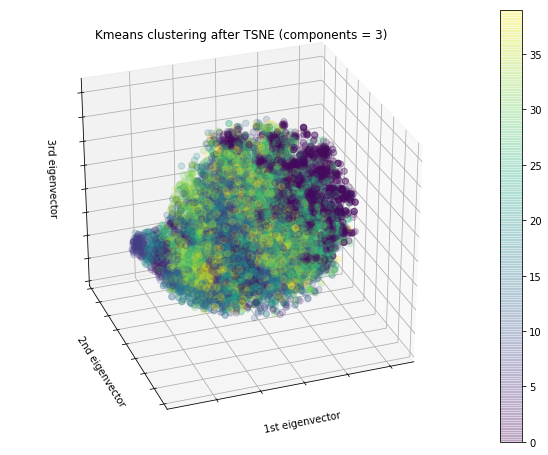

In [153]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
p = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
               c=y,
               #cmap=plt.cm.Set1,
               #edgecolor='k', 
               s=40, alpha=0.2)

ax.set_title("Kmeans clustering after TSNE (components = 3)")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

fig.colorbar(p)

In [154]:
seriousness_df.to_csv('open_fda_merged_cluster_PCA_tSNE.csv')